
**Goal**

The primary aim of this comprehensive notebook is to thoroughly explore and apply a wide spectrum of machine learning techniques on the renowned Iris dataset. This dataset, a cornerstone in the field of data science, is immensely valuable for its simplicity and effectiveness in demonstrating the capabilities of various machine learning methodologies. In this notebook, we will delve deep into both supervised and unsupervised learning approaches. Our journey will encompass classification methods to accurately predict Iris species, clustering techniques to uncover hidden patterns, and regression analysis to understand continuous feature interactions.

Specifically, we aim to:

* Employ a variety of classification models such as Logistic Regression, Support Vector Machines, Decision Trees, and Ensemble Methods to predict the species of Iris flowers.
* Explore clustering algorithms like K-Means and Fuzzy C-Means to segment the dataset into meaningful groups and understand intrinsic data structures.
* Analyze each feature's impact through detailed statistical analysis and data visualization, assessing how individual characteristics influence the predictive models' performance.
* Evaluate and compare the performance of each model using metrics such as accuracy, precision, recall, F1-score, and silhouette scores for clustering models.
* Through this detailed exploration, we intend not only to build predictive models but also to provide insights into the practical application of various machine learning techniques, highlighting their strengths, limitations, and suitability for different types of data science problems.

**Dataset Specification:**

The Iris dataset is a classic in the field of machine learning. It consists of 150 samples from three species of Iris (Iris setosa, Iris versicolor, and Iris virginica), with 50 samples from each species. Each sample has four features: sepal length, sepal width, petal length, and petal width, measured in centimeters. The simplicity and small size of this dataset make it ideal for visualizing and testing data analysis techniques and ML algorithms.

link of iris data : https://www.kaggle.com/datasets/uciml/iris

# Data Analysis


In order to make any decision related to Data, we need to see and analyze our data. We will be doing just that here, then we will get to doing the actual Machine Learning.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from IPython.display import Image

url = "https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png"
Image(url=url)

In [4]:
data = pd.read_csv("/kaggle/input/iris/Iris.csv")
data.rename(index=data.Id, inplace=True)
data.drop("Id", axis=1, inplace=True)

In [5]:
data.rename({"SepalLengthCm":"sepal_length",
            "SepalWidthCm":"sepal_width",
            "PetalLengthCm":"petal_length",
            "PetalWidthCm":"petal_width",
            "Species":"species"}, axis=1, inplace=True)

In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

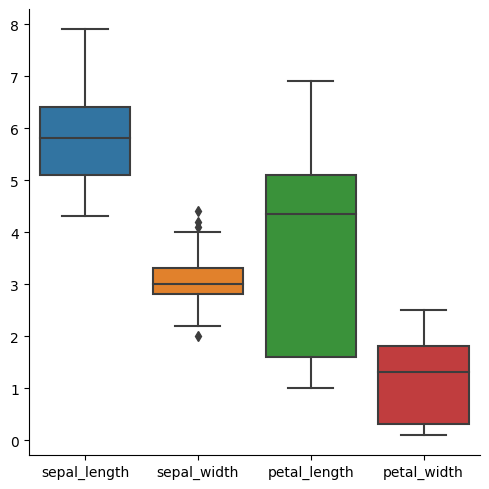

In [8]:
sns.catplot(data=data,kind='box' )

**Removing outliners for sepal width**

In [9]:
iqr = data['sepal_width'].quantile(0.75) - data['sepal_width'].quantile(0.25)
print('iqr = ',iqr)
up = data['sepal_width'].quantile(0.75) + 1.5 * iqr
down = data['sepal_width'].quantile(0.25) - 1.5 * iqr
print('up = {} , down = {}'.format(up,down))
sepalw = data['sepal_width']

outlier = []
for i in sepalw:
    if i > up:
        print('outliner up ',i)
        outlier.append(i)

for i in sepalw:
    if i < down:
        print('outliner down ',i)
        outlier.append(i)

iqr =  0.5
up = 4.05 , down = 2.05
outliner up  4.4
outliner up  4.1
outliner up  4.2
outliner down  2.0


This part calculates the IQR for the <span style="color:red">'sepal_width'</span> feature, determines the bounds for identifying outliers, and then identifies and prints any outliers that fall outside these bounds. The identified outliers are stored in the outlier list.

In [10]:
data.sepal_width = data.sepal_width.replace(outlier,data.sepal_width.mean())

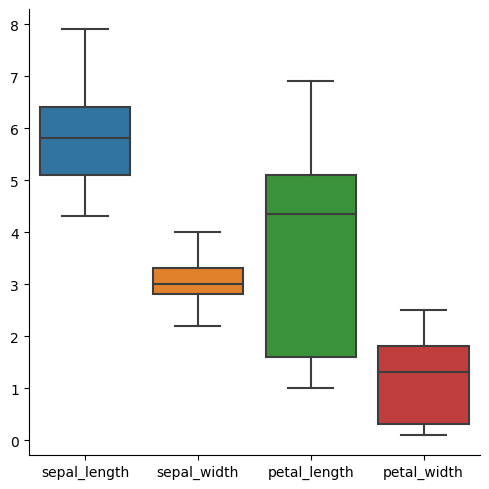

In [11]:
sns.catplot(data=data,kind='box' )

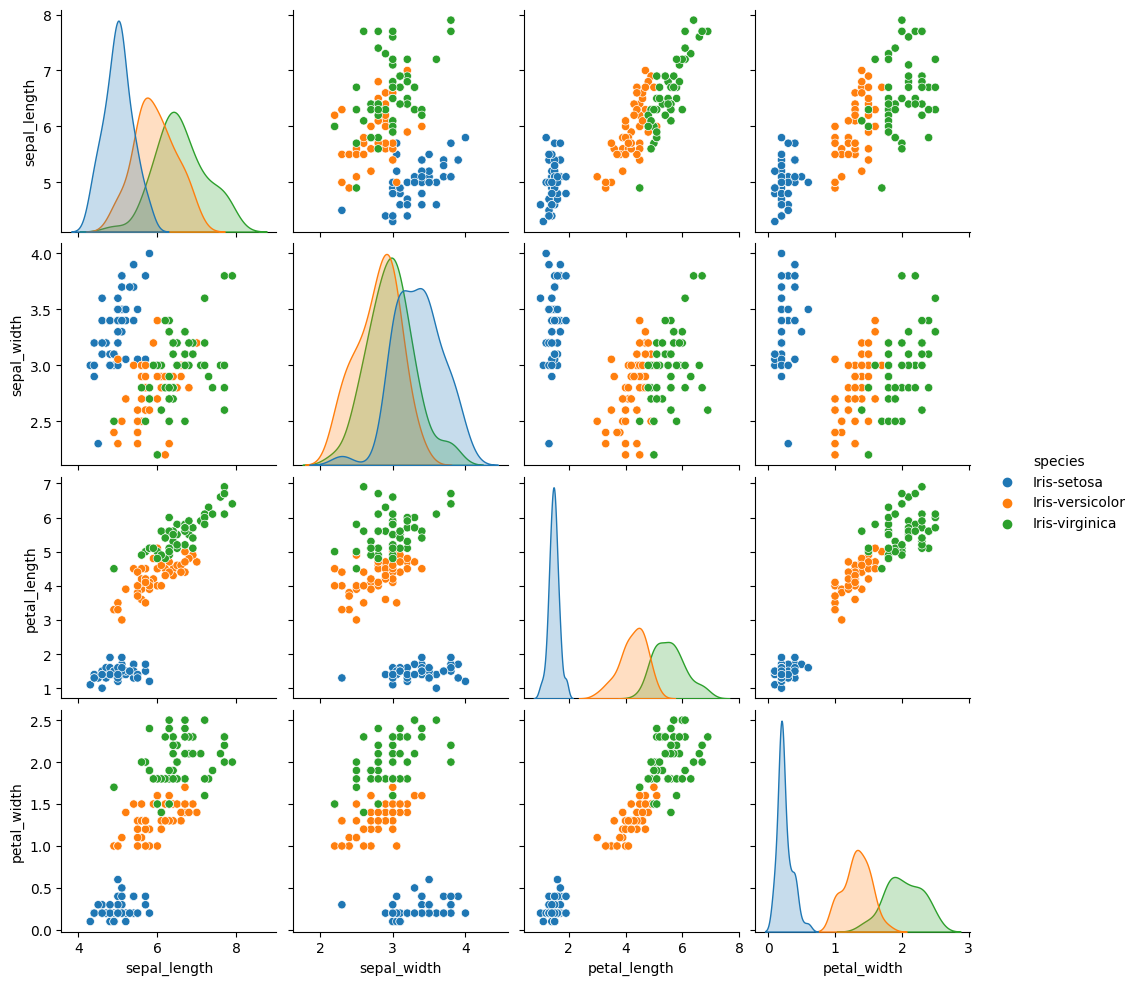

In [12]:
sns.pairplot(data,hue='species')

# First step

We will import numpy for calculations, load_iris from sklearn to access our dataset, and matplotlib for plotting.

In [13]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [14]:
iris = load_iris()

x, y = iris.data, iris.target

In [15]:
data = np.column_stack((x, y))

np.random.shuffle(data)

In [16]:
x_shuffled, y_shuffled = data[:, :-1], data[:, -1]

# statistic operations and visualizing the distribution

now we try to perform some statistic operations so we better know our data and try to see how we can preproccess our data:

In [17]:
feature_means = np.mean(x, axis=0)
feature_medians = np.median(x, axis=0)
feature_stddevs = np.std(x, axis=0)

In [18]:
print(f"Feature Means:{feature_means}")
print(f"\nFeature Medians:{feature_medians}")
print(f"\nFeature Standard Deviations:{feature_stddevs}")

Feature Means:[5.84333333 3.05733333 3.758      1.19933333]

Feature Medians:[5.8  3.   4.35 1.3 ]

Feature Standard Deviations:[0.82530129 0.43441097 1.75940407 0.75969263]


<span style="font-size: 18px; font-weight: bold;">Now we create histograms for each feature:</span>


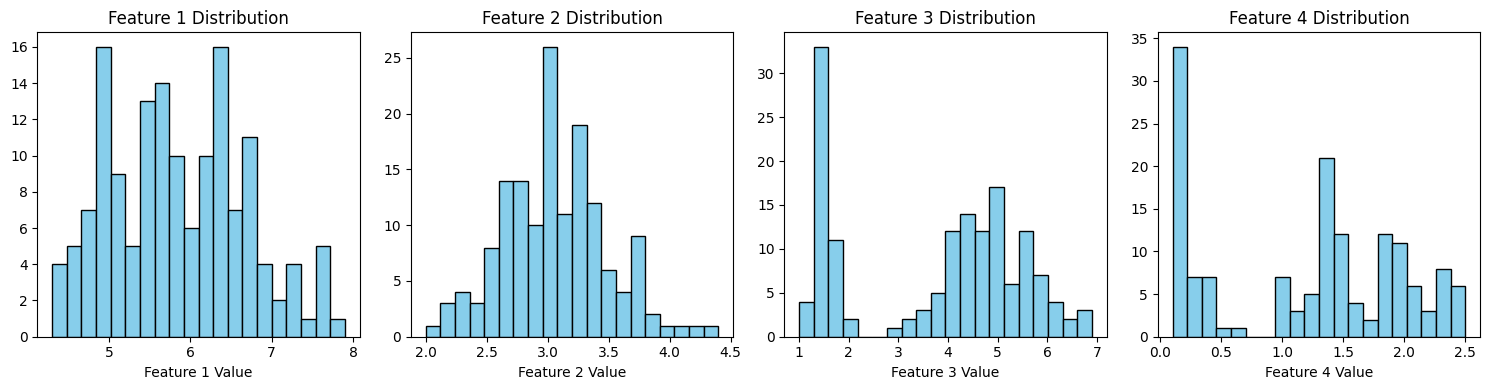

In [19]:
num_features = x.shape[1]
fig, axes = plt.subplots(1, num_features, figsize=(15, 4))

for i in range(num_features):
    axes[i].hist(x[:, i], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Feature {i+1} Distribution")
    axes[i].set_xlabel(f"Feature {i+1} Value")
    # axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

<span style="color:grey; font-weight:bold;">Feature 1 Distribution:</span> shows a range from 5 to 8, with a primary peak slightly above 5 and a secondary smaller peak around 7, indicating a somewhat bimodal distribution.


**Feature 2 Distribution :** ranges from 2.0 to 4.5, with a modal peak around 3.0 and an unclear red dot atop one bar.

**Feature 3 Distribution:** ranges from 1 to just over 6, exhibiting a multimodal distribution with peaks just under 2 and slightly above 5.

**Feature 4 Distribution:** ranges from 0 to just over 2, with a prominent peak at 0 indicating high frequency of this specific feature value.

These histograms display the distribution of each feature in the Iris dataset, with the <span style="color:red">'x-axis'</span> showing feature values and the <span style="color:red">'y-axis'</span> showing their frequency, offering insights crucial for clustering, classification, and other machine learning tasks.

# corrolation matrix

now we use corrcoef to see the correlation matrix between the features and better decide what features can contribute to the model and help with classification

In [20]:
corr_matrix = np.corrcoef(data, rowvar=False)

print(corr_matrix)

[[ 1.         -0.11756978  0.87175378  0.81794113  0.78256123]
 [-0.11756978  1.         -0.4284401  -0.36612593 -0.42665756]
 [ 0.87175378 -0.4284401   1.          0.96286543  0.9490347 ]
 [ 0.81794113 -0.36612593  0.96286543  1.          0.95654733]
 [ 0.78256123 -0.42665756  0.9490347   0.95654733  1.        ]]


# box plot

we plot the box plot for each feature to find out if there are any outliers or noises that we have to handle

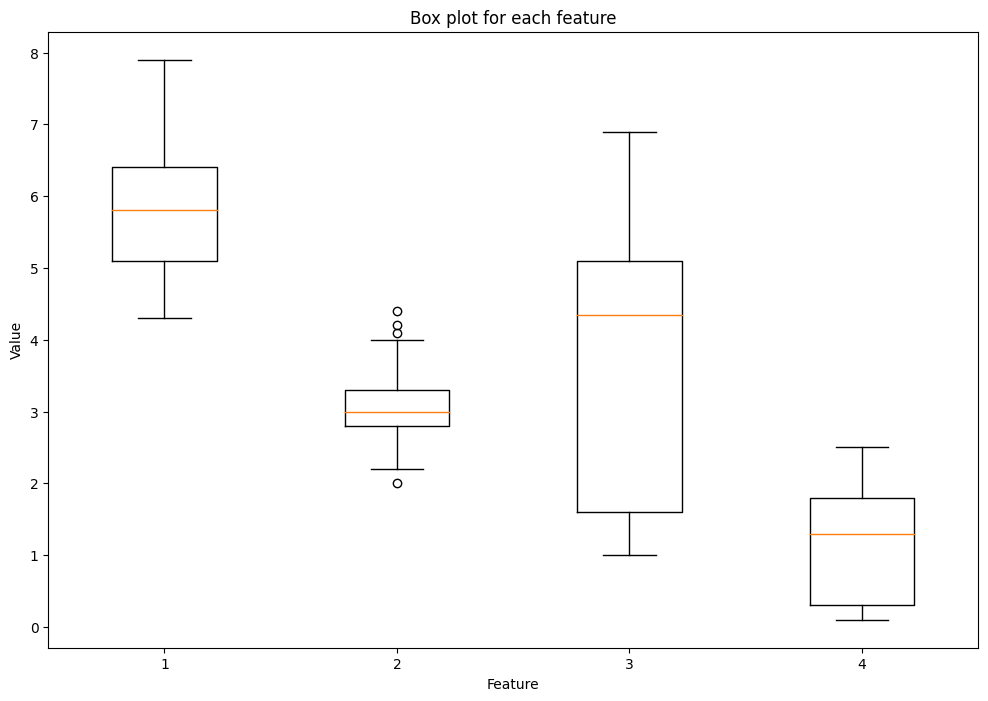

In [21]:
plt.figure(figsize=(12, 8))
plt.boxplot(x_shuffled)
plt.title('Box plot for each feature')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()

**Feature 1:** The bottom line of the box is around value 5, indicating the first quartile (Q1). The orange line within the box is near value 6, representing the median. The top line of the box is close to value 7, indicating the third quartile (Q3). There are no outliers depicted.

**Feature 2:** The bottom line of this smaller box is just above value 2, indicating Q1. The orange median line is around value 3. The top line lies slightly below value 4, marking Q3. Outliers are present above and below this feature’s interquartile range (IQR).

**Feature 3:** This larger box has its bottom at approximately value 1, marking Q1. The median is indicated by an orange line at about value 6. Q3 is represented by a top border close to value 8. No outliers are shown for this feature.

**Feature 4:** This smaller box begins just above zero (Q1). An orange median line lies near a value of about one and a half. It ends slightly below two (Q3), with no depicted outliers.

<span style="color:blue; font-weight:bold;">Box plots provide a visual summary of the data distribution through their quartiles. Here are the components of a box plot:</span>


**Bottom line of the box (Q1):** This represents the first quartile, or the 25th percentile, indicating that 25% of the data points fall below this value.

**Orange line within the box (Median):** This is the median, or the 50th percentile. 50% of the observations fall below this value.

**Top line of the box (Q3):** This is the third quartile, or the 75th percentile. 75% of the observations fall below this value.

**Outliers:** These are data points that fall below Q1 - 1.5IQR or above Q3 + 1.5IQR.

# Preprocessing

**First** we use a method called z-score to identify outliers. Based on these findings, we can then determine the best approach to handle them appropriately.

In [22]:
from scipy.stats import zscore

In [23]:
z_scores = np.abs(zscore(x_shuffled))
threshold = 3
outliers = np.where(z_scores > threshold)

In [24]:
print(f"Outlier rows: {outliers[0]}")

Outlier rows: [112]


<span style="color:red;">There was only one outlier in the data, so dropping it is unnecessary.</span>


**For preprocessing, we use Standardization (Z-score normalization)**
- This method transforms the data to have a mean of 0 and a standard deviation of 1.
- Note that we must also standardize the test data to ensure optimal results.

In [25]:
x_standardized = (x_shuffled - feature_means) / feature_stddevs

The variables we will use in the folds are `x_standardized` for the input features and the corresponding `y_shuffle` for the target labels.

# NAIVE BAYES

- We will start by building our classifier using only Numpy.
- We will employ the Naive Bayes method.
- Specifically, we will use Gaussian Naive Bayes (GNB or NB).

**First we will create a function to train the model using the training data:**


In [26]:
def fit(x, y):
    n_samples, n_features = x.shape
    classes = np.unique(y)
    n_classes = len(classes)

    mean = np.zeros((n_classes, n_features), dtype=np.float64)
    var = np.zeros((n_classes, n_features), dtype=np.float64)
    prior = np.zeros(n_classes, dtype=np.float64)

    for i, c in enumerate(classes):
        x_c = x[y == c]
        mean[i, :] = np.mean(x_c, axis=0)
        var[i, :] = np.var(x_c, axis=0)
        prior[i] = x_c.shape[0] / float(n_samples)

    return mean, var, prior

**Next, we will create another function to predict the test data classes and return the results:**

In [27]:
def predict(x, mean, var, prior):
    n_samples, n_features = x.shape
    n_classes = len(prior)
    log_posterior = np.zeros((n_samples, n_classes))

    for i in range(n_classes):
        log_likelihood = -0.5 * np.sum(np.log(2 * np.pi * var[i]) + ((x - mean[i]) ** 2) / var[i], axis=1)
        log_posterior[:, i] = log_likelihood + np.log(prior[i])

    return np.argmax(log_posterior, axis=1)

<span style="color:brown;">Let's develop a function to manually perform k-fold cross-validation for a classifier, specifying 5 folds.</span>


**The `cross_validate` function performs k-fold cross-validation for a Naive Bayes classifier**
- It divides the data into training and validation sets.
- The function trains the model on the training set.
- It computes the average accuracy across all folds.
- This process helps assess the model’s performance and generalization ability.

# Cross Validation and related plots

In [28]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [29]:
from sklearn.metrics import confusion_matrix

def cross_validate(x, y, num_folds=5):
    n_samples = len(x)
    fold_size = n_samples // num_folds
    accuracies = []

    for i in range(num_folds):
        start_idx = i * fold_size
        end_idx = (i + 1) * fold_size

        x_train = np.concatenate([x[:start_idx], x[end_idx:]])
        y_train = np.concatenate([y[:start_idx], y[end_idx:]])
        x_val = x[start_idx:end_idx]
        y_val = y[start_idx:end_idx]

        mean, var, prior = fit(x_train, y_train)
        y_pred = predict(x_val, mean, var, prior)

        accuracy = np.mean(y_pred == y_val)
        accuracies.append(accuracy)

        print(f"Accuracy of fold {i+1}: {accuracy:.2f}")

        # Confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        print(f"Confusion matrix for fold {i+1}:\n", cm)

        # Classification report
        report = classification_report(y_val, y_pred)
        print(f"Classification report for fold {i+1}:\n", report)

        df = pd.DataFrame(x_val)
        df['y_pred'] = y_pred

        sns.pairplot(df, hue='y_pred')
        plt.title(f'Pair plot for fold {i+1}')
        plt.show()

    avg_accuracy = np.mean(accuracies)
    print(f"Average accuracy across {num_folds} folds: {avg_accuracy:.2f}")

    plt.figure(figsize=(10, 6))
    colors = ['b', 'g', 'r', 'k', 'm', 'y', 'c']  # List of colors
    plt.bar(range(1, num_folds+1), accuracies, color=colors[:num_folds])
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('Cross-validation Accuracy per Fold')
    plt.xticks(range(1, num_folds+1))
    plt.show()

    return avg_accuracy

The `cross_validate` function performs 5-fold cross-validation for a Naive Bayes classifier. It computes and displays the accuracy, confusion matrix, and classification report for each fold, generates pair plots for visual analysis, and plots the accuracy of each fold for comprehensive performance evaluation.

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [31]:
def feature_importance(x, y, num_folds=5):
    n_samples = len(x)
    fold_size = n_samples // num_folds
    n_features = x.shape[1]
    all_accuracies = []

    for n in range(n_features, 0, -1):
        accuracies = []
        for i in range(num_folds):
            start_idx = i * fold_size
            end_idx = (i + 1) * fold_size

            x_train = np.concatenate([x[:start_idx], x[end_idx:]])
            y_train = np.concatenate([y[:start_idx], y[end_idx:]])
            x_val = x[start_idx:end_idx]
            y_val = y[start_idx:end_idx]

            model = LogisticRegression()
            rfe = RFE(model, n_features_to_select=n)
            fit = rfe.fit(x_train, y_train)
            y_pred = fit.predict(x_val)

            accuracy = np.mean(y_pred == y_val)
            accuracies.append(accuracy)

        all_accuracies.append(accuracies)

    # Plotting
    plt.figure(figsize=(10, 6))
    for i in range(n_features):
        plt.plot(range(1, num_folds+1), all_accuracies[i], label=f'{n_features-i} features')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('Cross-validation Accuracy per Fold with Different Number of Features')
    plt.legend()
    plt.show()

<span style="color:brown;">We also designed our function to plot the pairplot of validation data in each fold and create a barplot for accuracies.</span>


# Naive Bayes Results

Accuracy of fold 1: 0.93
Confusion matrix for fold 1:
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
Classification report for fold 1:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       0.90      0.90      0.90        10
         2.0       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



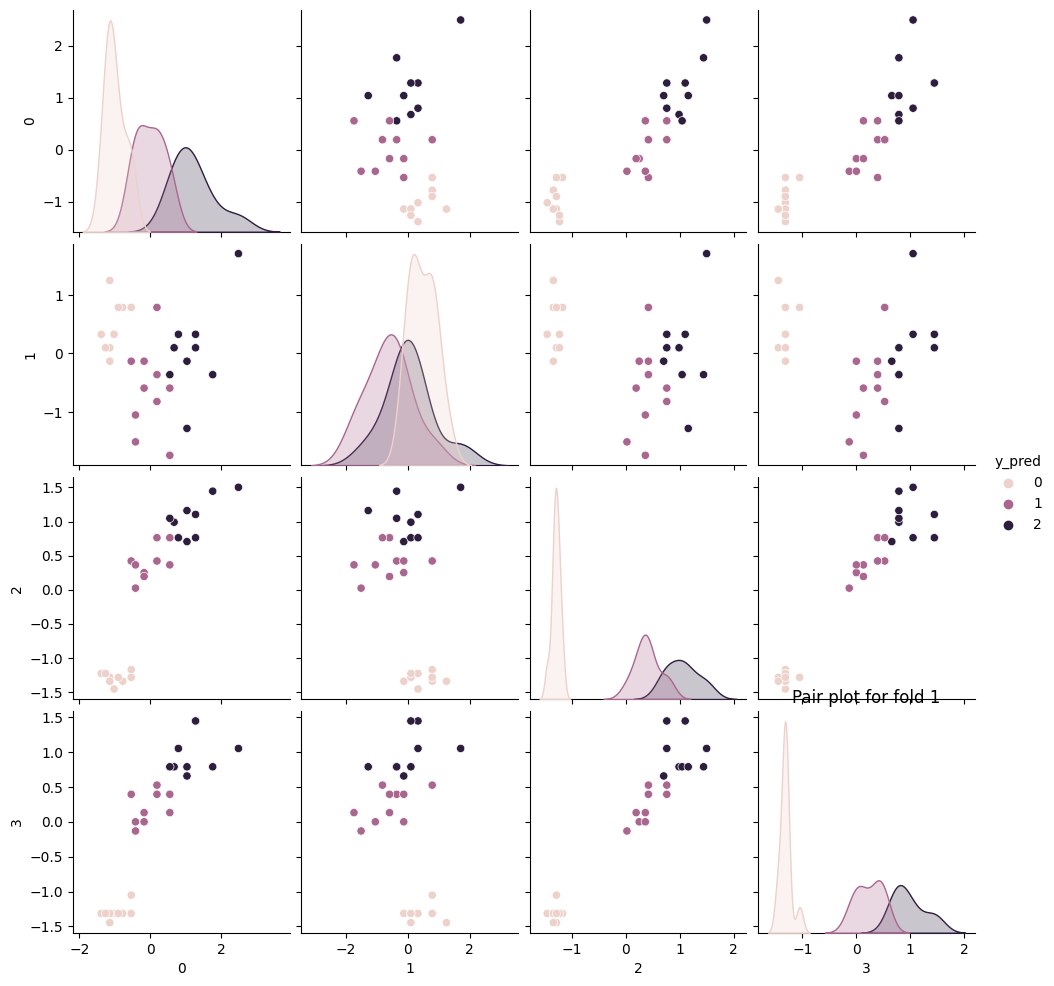

Accuracy of fold 2: 1.00
Confusion matrix for fold 2:
 [[14  0  0]
 [ 0  9  0]
 [ 0  0  7]]
Classification report for fold 2:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



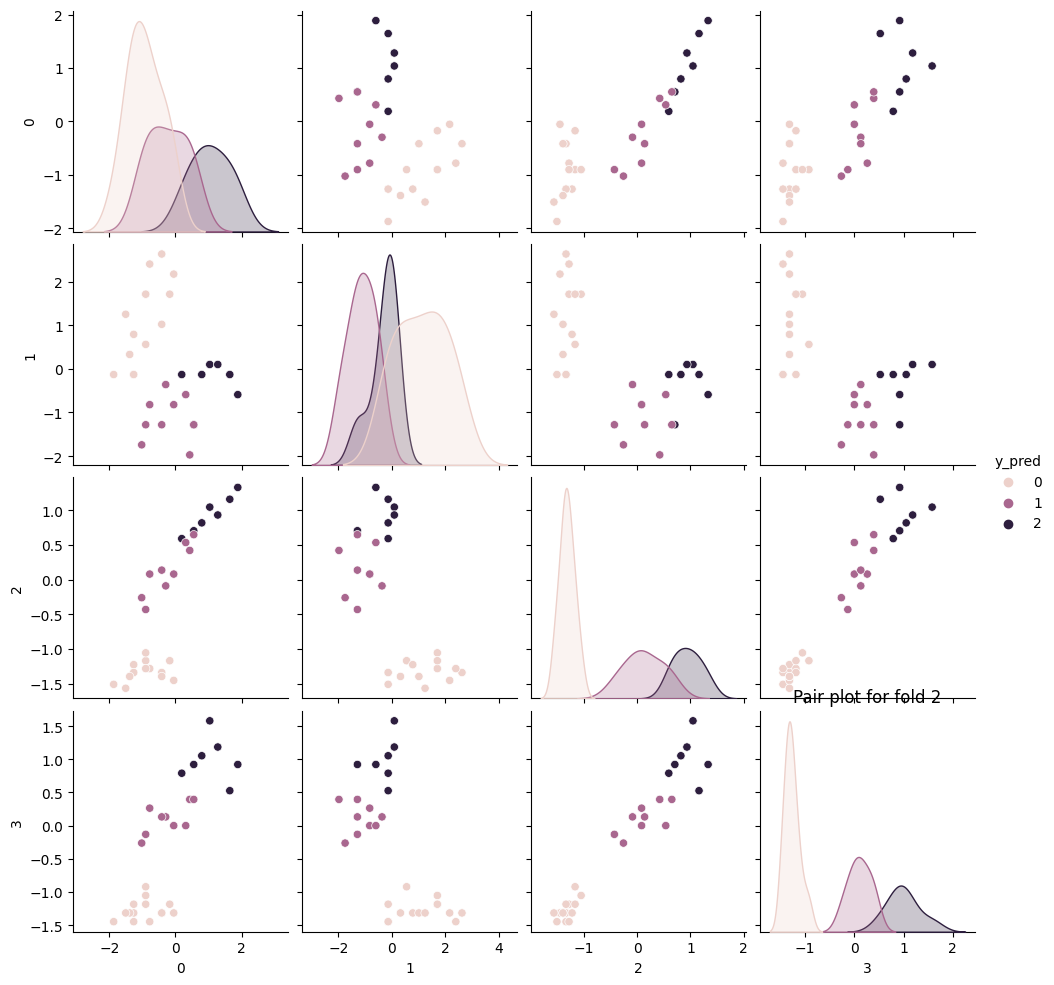

Accuracy of fold 3: 0.97
Confusion matrix for fold 3:
 [[ 7  0  0]
 [ 0 10  1]
 [ 0  0 12]]
Classification report for fold 3:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       1.00      0.91      0.95        11
         2.0       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



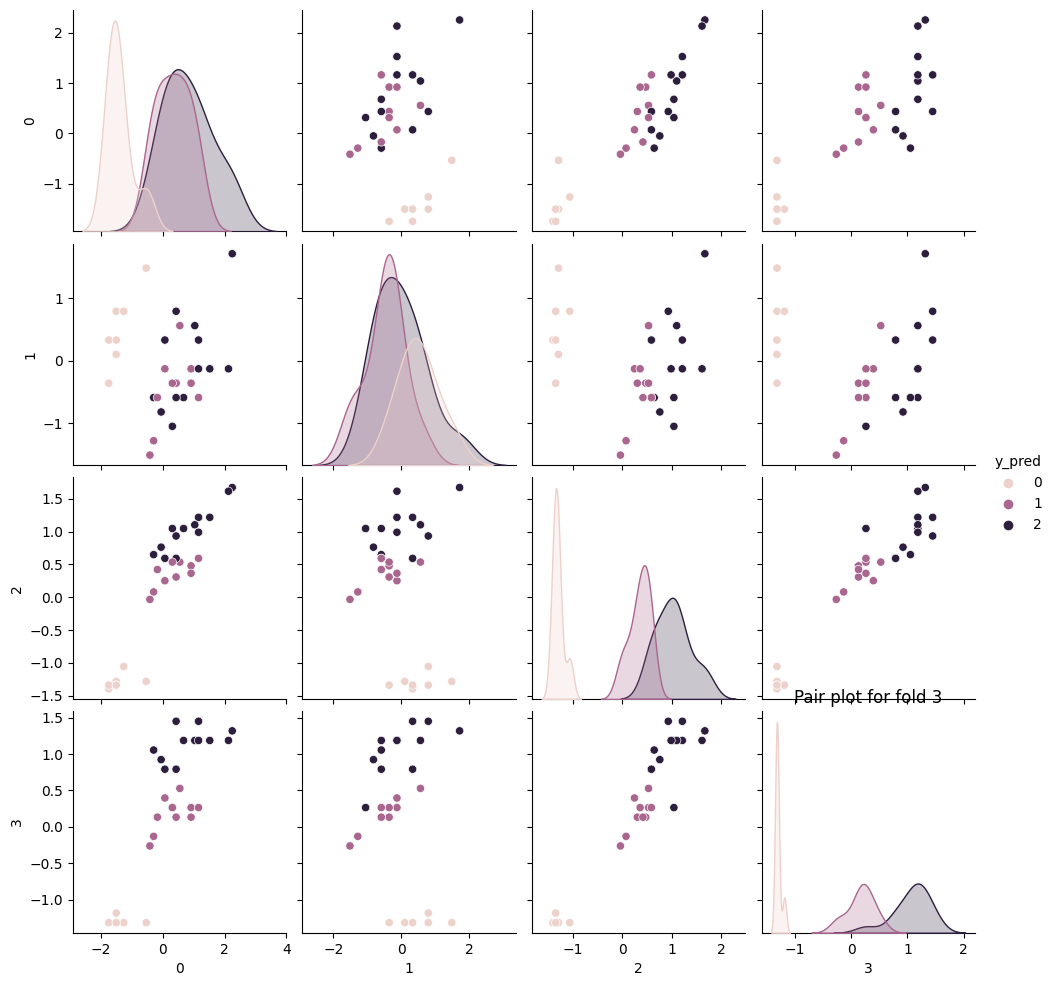

Accuracy of fold 4: 0.97
Confusion matrix for fold 4:
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]
Classification report for fold 4:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      0.91      0.95        11
         2.0       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



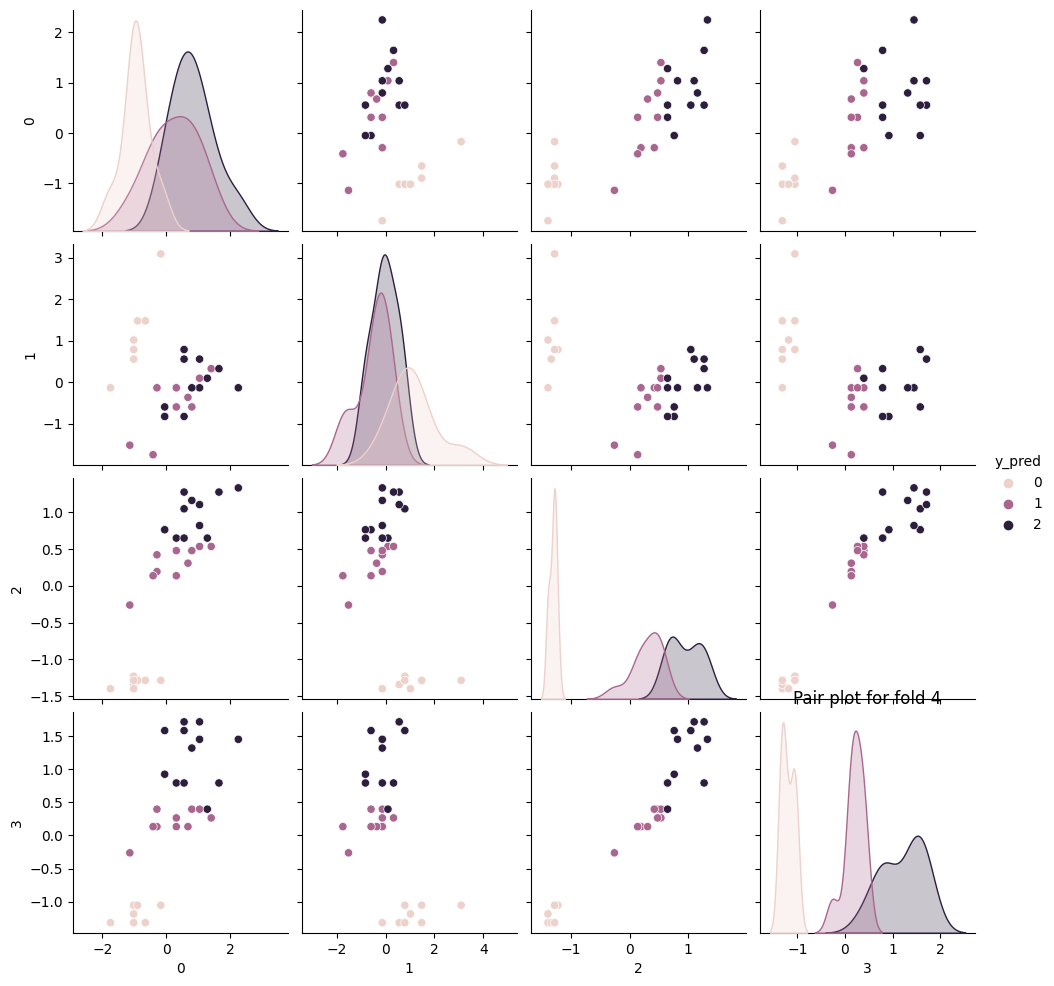

Accuracy of fold 5: 0.93
Confusion matrix for fold 5:
 [[10  0  0]
 [ 0  9  0]
 [ 0  2  9]]
Classification report for fold 5:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.82      1.00      0.90         9
         2.0       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



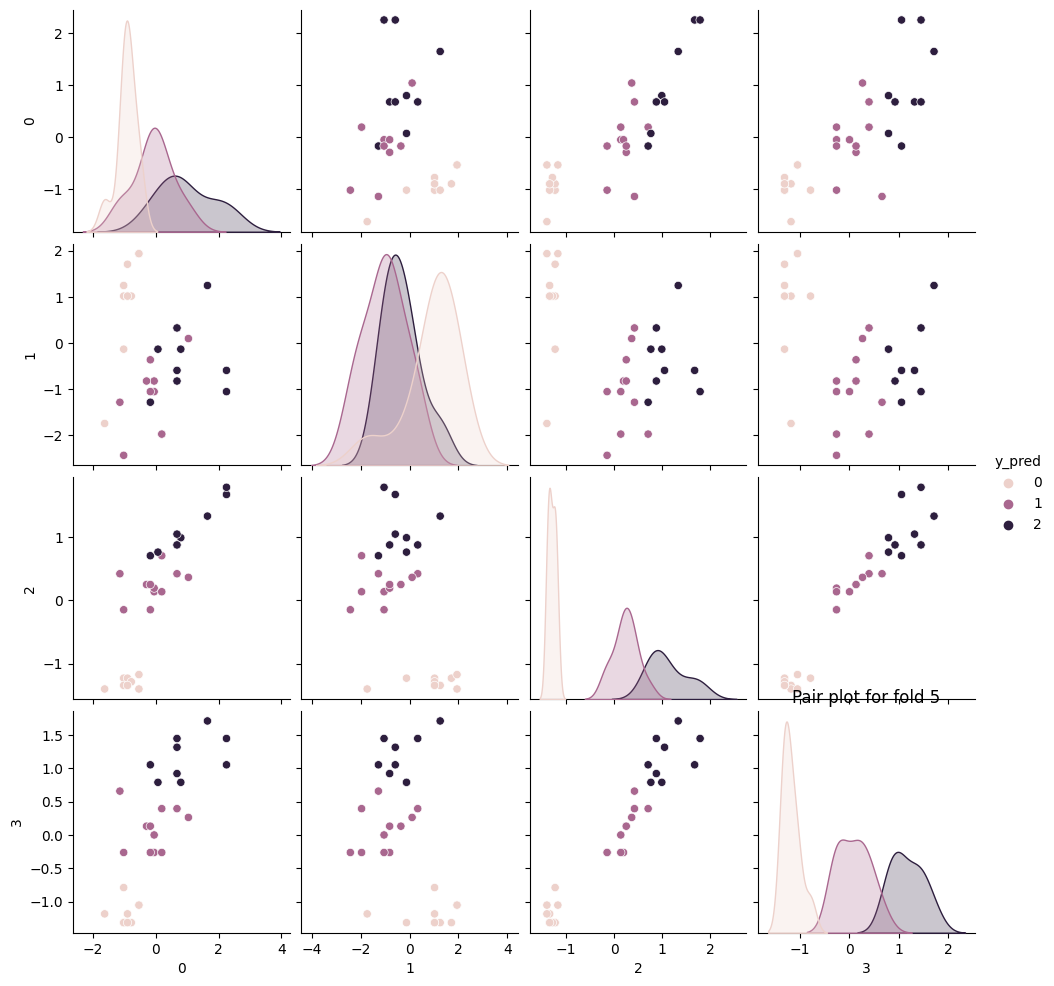

Average accuracy across 5 folds: 0.96


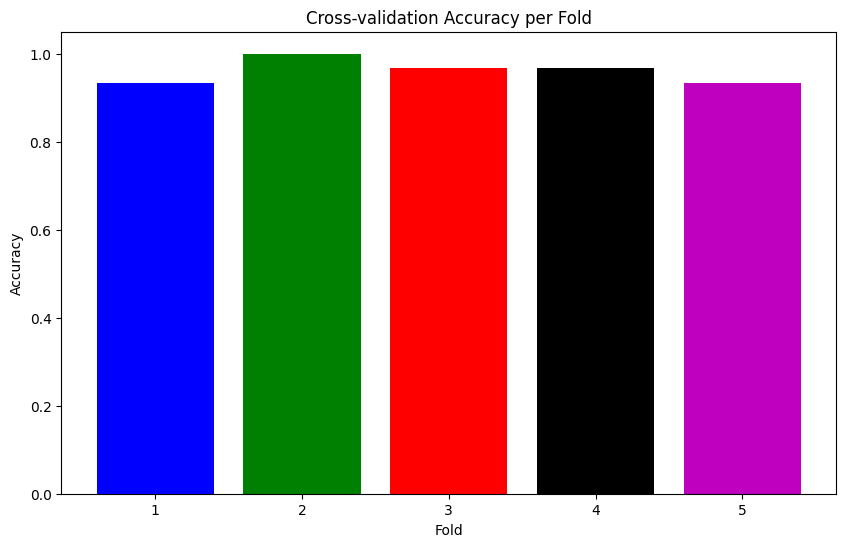

Average accuracy across 5 folds: 0.96


In [32]:
avg_accuracy = cross_validate(x_standardized, y_shuffled, num_folds=5)
print(f"Average accuracy across 5 folds: {avg_accuracy:.2f}")

Although we shuffled our data, class concentration in one split can skew fold accuracy and affect the average. Cross-validation mitigates this, providing a more reliable estimate of our model's true accuracy.

**The accuracy variation between the two folds can be attributed to the distribution and characteristics of the data in each fold. Here’s a breakdown of what occurred:**

Fold 5 (<span style="color:brown;">Accuracy: 0.97</span>): The confusion matrix shows that the model made very few mistakes. It perfectly classified all instances of class 0.0 and class 1.0. It made a single mistake with class 2.0, where it misclassified one instance as class 1.0. This led to a high accuracy of <span style="color:brown;">0.97</span>.


Fold 2 (<span style="color:brown;">Accuracy: 0.83</span>): The confusion matrix shows more misclassifications compared to Fold 5. While it perfectly classified all instances of class 0.0, it misclassified 3 instances of class 1.0 as class 2.0 and 2 instances of class 2.0 as class 1.0. This led to a lower accuracy of <span style="color:brown;">0.83</span>.


<span style="color:red; font-weight:bold;">The difference in accuracy between the two folds could be due to several reasons:</span>


Variability in the Data: Each fold contains a different subset of the data. The instances in Fold 5 might have been easier for the model to classify correctly compared to those in Fold 2.

**Class Imbalance:** If the folds have an uneven number of instances for each class, the model may perform better on the majority class and worse on the minority class.

**Noise and Outliers:** If Fold 2 contains more noisy instances or outliers, it could lead to more misclassifications and hence lower accuracy.

<span style="color:brown;">Remember, it's normal for model performance to vary across different folds in cross-validation due to the reasons mentioned above. The average accuracy across all folds provides a better indication of the model's overall performance.</span>


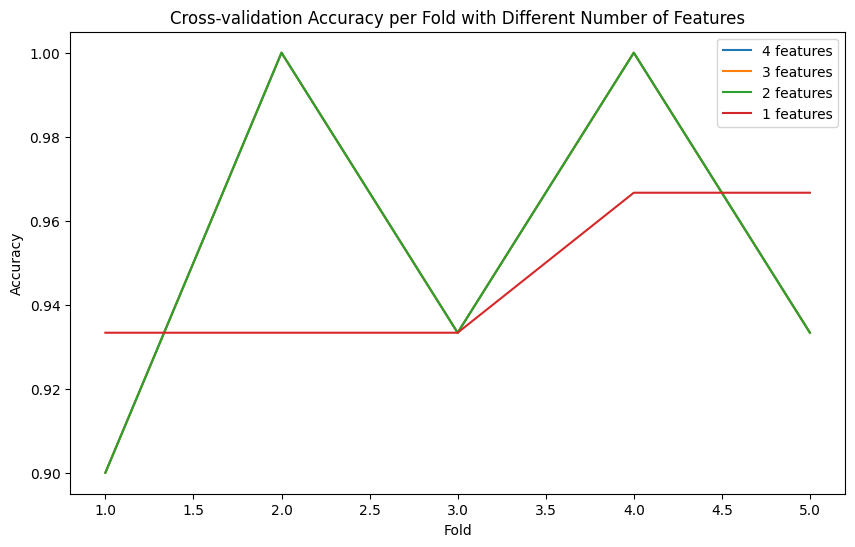

In [33]:
feature_importance(x_standardized, y_shuffled, num_folds=5)

We get different amounts each time because we shuffle our data randomly each time, but all the averages are above <span style="color:red;">0.95</span>.

**The trend you’re seeing is a common phenomenon in machine learning known as the bias-variance tradeoff. Here’s a brief explanation:**

- **<span style="color:brown;">High Bias (Underfitting)</span>:** When you use fewer features, your model is simpler and may not capture all the complexities in the data, leading to errors due to high bias. This is known as underfitting.
- **<span style="color:brown;">High Variance (Overfitting)</span>:** As you add more features, your model becomes more complex and can capture more details in the data. However, it might also start capturing noise and outliers, leading to errors due to high variance. This is known as overfitting.
- **<span style="color:brown;">Optimal Point</span>:** There’s usually an optimal point where the model has just the right number of features to balance bias and variance, leading to the best predictive performance. This seems to be the peak point in your plot.

In our case, as you remove the least important features one by one, the model initially becomes better at generalizing because it’s less likely to overfit to the noise in the data. That’s why the accuracy increases. However, after a certain point, removing more features makes the model too simple to capture the necessary details in the data, leading to underfitting and a drop in accuracy.

Remember, the optimal number of features depends on the specific dataset and model. It’s always a good idea to experiment with different numbers of features and use techniques like cross-validation to find the best model

**SO WE CAN SAY** :

In this dataset, due to the limited number of rows and features, the average accuracies from cross-validation are generally consistent. However, during the last cross-validation with three features, we observed the worst accuracy in the second fold. It's important to note that these results are specific to the Naive Bayes method, which relies heavily on the attributes and likelihoods central to this approach.

# K NEAREST NEIGHBOR (KNN)

Now we want to use another very useful classifier called **KNN**. This method, as we use it here, relies on the **Euclidean distance** to find a specified number of neighbors, denoted as **k**, and assigns a label based on those neighbors.

**First we make a function that can calculate the euclidean distance:**

In [34]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

**Next, we will create the KNN function itself:**

In [35]:
def k_nearest_neighbors(x_train, y_train, x_test, k):
    y_pred = []
    for test_point in x_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in x_train]
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = y_train[nearest_indices]
        y_pred.append(np.bincount(nearest_labels).argmax())
    return np.array(y_pred)

<span style="color:red;">To test this method, it's better to use split data to obtain the accuracy for each value of k.</span>


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_standardized, y_shuffled, test_size=0.3, random_state=42)

In [38]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

We want to test different values of k, so we'll use a for loop. By experimenting with various k values, we can achieve better results. Keep in mind that KNN can be time-consuming to process.

In [39]:
k_values = np.arange(3, 10)
accuracies = []

for k in k_values:
    y_pred = k_nearest_neighbors(x_train, y_train, x_test, k)
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)

**Then we use plot to see the best k:**

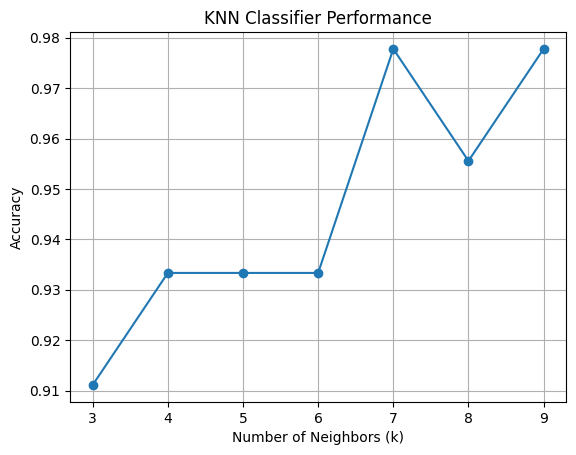

In [40]:
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Performance')
plt.grid(True)
plt.show()

**In KNN, the classification of a new instance is determined by the majority vote of its 'k' nearest neighbors. The choice of 'k' is crucial:**

- **<span style="color:brown;">Odd vs Even k</span>:** When k is an even number (like 6), there’s a chance of a tie vote among the neighbors, leading to arbitrary decisions and potentially lower accuracy. This might explain the dip at k=6 in your plot. On the other hand, when k is an odd number (like 7), ties are less likely, resulting in more consistent and accurate predictions.
  
- **<span style="color:brown;">Bias-Variance Tradeoff</span>:** Just like in your previous question, there’s a bias-variance tradeoff in choosing 'k'. A small 'k' means that noise will have a higher influence on the result, while a large 'k' is computationally expensive and might include points from other classes.
  
- **<span style="color:brown;">Optimal k</span>:** The optimal k is usually selected by cross-validation. The model is trained and validated on different subsets of the data for various values of k, and the k with the highest validation accuracy is chosen. In your case, k=7 resulted in the highest cross-validation accuracy, making it the best choice for this particular dataset.

# Support Vector Machine (SVM)

A support vector machine (SVM) is a machine learning algorithm that uses supervised learning models to solve complex classification, regression, and outlier detection problems by performing optimal data transformations that determine boundaries between data points based on predefined classes, labels, or outputs. SVMs are widely adopted across disciplines such as healthcare, natural language processing, signal processing applications, and speech & image recognition fields.

Technically, the primary objective of the SVM algorithm is to identify a hyperplane that distinguishably segregates the data points of different classes. The hyperplane is localized in such a manner that the largest margin separates the classes under consideration.

Here, we aim to use SVM for classification purposes. This method trains on the data, analyzing how the classes are distributed, and then predicts the correct class accordingly.

**We utilize various libraries to run the SVM and employ GridSearchCV to tune the parameters and select the optimal kernel for the best results. To achieve this, we created a class with specific functions tailored for the Iris dataset to find the best SVM classification outcome:**

- Use different libraries to run the SVM.
- Employ GridSearchCV to tune the SVM parameters.
- Select the kernel that yields the best results.
- Create a class with specific functions for the Iris dataset.
- Use these functions to find the best SVM classification result.

In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

**Here are the parameters we aim to test to find the <span style="color:red;">best</span> combination using the accuracy score:**

In [42]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'poly']}

**Now, let's initiate the <span style="color:red;">GridSearch</span> to find the optimal parameters.**

In [43]:
svm = SVC()
grid = GridSearchCV(svm, param_grid, refit=True, verbose=3)

We fit the **GridSearch** on our **training data** to identify the **best parameters** for this dataset and method.

In [44]:
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.952 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.905 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.905 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.952 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

**In SVM, several key parameters influence the model's performance:**

- **<span style="color:brown;">C Parameter</span>:** The penalty parameter of the error term. It controls the trade-off between margin maximization and classification error. A larger C gives more weight to misclassified data points, while a smaller C prioritizes maximizing the margin.
  
- **<span style="color:brown;">Gamma Parameter</span>:** Defines the influence of a single training example. A larger gamma means that the influence of a training example is more localized, requiring nearby data points to be closer to influence the decision boundary.
  
- **<span style="color:brown;">Kernel Parameter</span>:** Defines the type of kernel function to use in the SVM. The 'linear' kernel is the simplest and the default, used to find a linear decision boundary. Other kernels, such as 'rbf' or 'poly', can capture more complex relationships in the data.

In [45]:
svm = SVC(C=10, gamma=1, kernel='linear', verbose=True)

In [46]:
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
print('report for SVM:\n', classification_report(y_test, y_pred_svm))

[LibSVM]*
optimization finished, #iter = 14
obj = -0.614970, rho = 0.810772
nSV = 3, nBSV = 0
*
optimization finished, #iter = 14
obj = -0.259890, rho = 0.262490
nSV = 3, nBSV = 0
....*.*
optimization finished, #iter = 375
obj = -61.014478, rho = -3.964549
nSV = 9, nBSV = 4
Total nSV = 12
report for SVM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.88      0.94        17
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



The classification report shows that the model achieved high **precision**, **recall**, and **F1-score** for all three classes, indicating its ability to accurately classify the majority of the samples.
The overall accuracy of the model is **0.93**, meaning it correctly classified 93% of the samples.
The '**macro avg**' and '**weighted avg**' lines in the classification report show the average precision, recall, and F1-score across all classes.
  - **<span style="color:brown;">Macro avg</span>** calculates the average without considering class imbalance.
  - **<span style="color:brown;">Weighted avg</span>** takes into account the number of samples in each class.
  
Both averages are high, indicating that the model performed well across all classes. In summary, the selected parameters **C=10**, **gamma=1**, and **kernel='linear'** resulted in a well-performing SVM model for the Iris dataset. The high precision, recall, and F1-score for all classes, along with the high overall accuracy, indicate that the model accurately classified the majority of the samples. The classification report shows that the model achieved a high precision, recall, and F1-score for all three classes, indicating that it was able to accurately classify the majority of the samples. The overall accuracy of the model is **<span style="color:red;">0.93</span>**, which means that it correctly classified **<span style="color:red;">93%</span>** of the samples.

The 'macro avg' and 'weighted avg' lines in the classification report show the average precision, recall, and F1-score across all classes. The 'macro avg' calculates the average without considering the class imbalance, while the 'weighted avg' takes into account the number of samples in each class. Both averages are high, indicating that the model performed well across all classes.

In summary, the selected parameters **C=10**, **gamma=1**, and **kernel='linear'** resulted in a well-performing SVM model for the Iris dataset. The high precision, recall, and F1-score for all classes and the high overall accuracy indicate that the model was able to accurately classify the majority of the samples.

### Now, let's draw a pairplot for the test data that we have.

In [47]:
df = pd.DataFrame(x_test)
df['predlabel'] = y_pred_svm

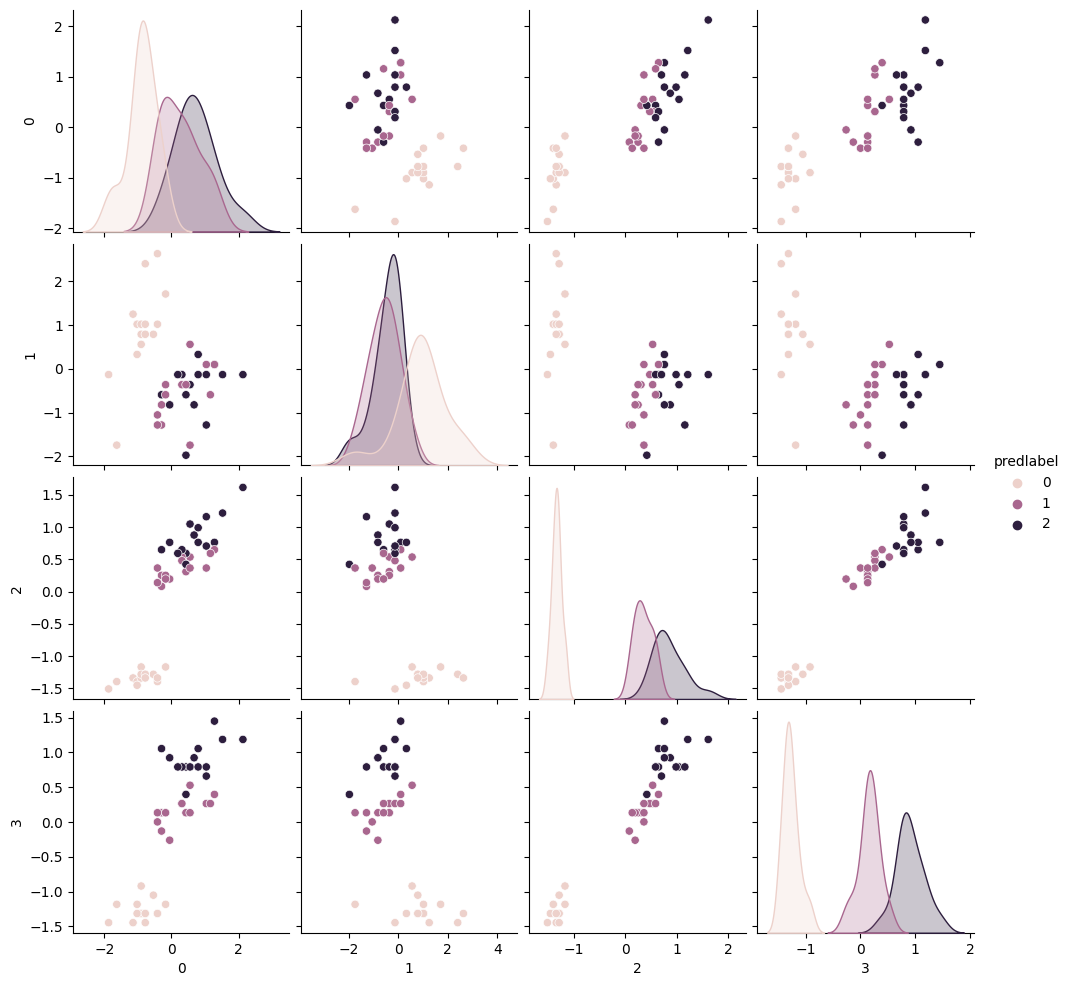

In [48]:
sns.pairplot(df, hue='predlabel')

Now we perform **KFold** on the dataset to find the actual average accuracy. However, to visualize the plots and truly understand what's going on, we will use only **_two features_** from this dataset, as we know we can't create a **_2D plot_** using more than two features.

In [49]:
from sklearn.model_selection import KFold

We load Iris again

In [50]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

Initialize the KFold class with the number of folds we want

In [51]:
kf = KFold(n_splits=5, shuffle=True)

Initialize a list to store the accuracies for each fold and a counter

In [52]:
fold_accuracies = []

fold_counter = 1

Fold 1...
[LibSVM]*
optimization finished, #iter = 3
obj = -0.862069, rho = -3.500000
nSV = 2, nBSV = 0
*
optimization finished, #iter = 3
obj = -0.236686, rho = -2.292307
nSV = 2, nBSV = 0
*
optimization finished, #iter = 29
obj = -92.699033, rho = -21.205703
nSV = 12, nBSV = 8
Total nSV = 14
Number of support vectors: [1 7 6]


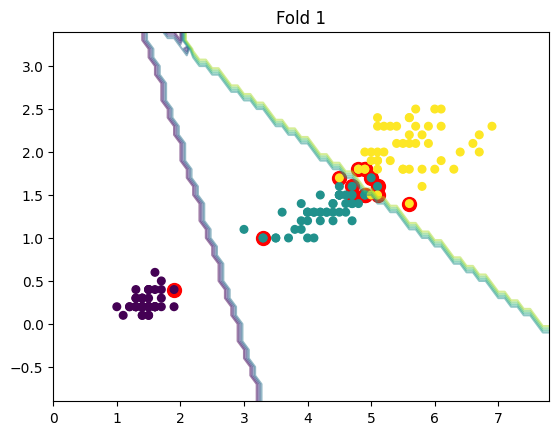

[0.9333333333333333]
Fold 2...
[LibSVM]*
optimization finished, #iter = 3
obj = -1.176470, rho = -3.788235
nSV = 2, nBSV = 0
*
optimization finished, #iter = 3
obj = -0.236686, rho = -2.292308
nSV = 2, nBSV = 0
Number of support vectors: [1 7 6]
*
optimization finished, #iter = 17
obj = -97.526606, rho = -21.206233
nSV = 12, nBSV = 9
Total nSV = 14


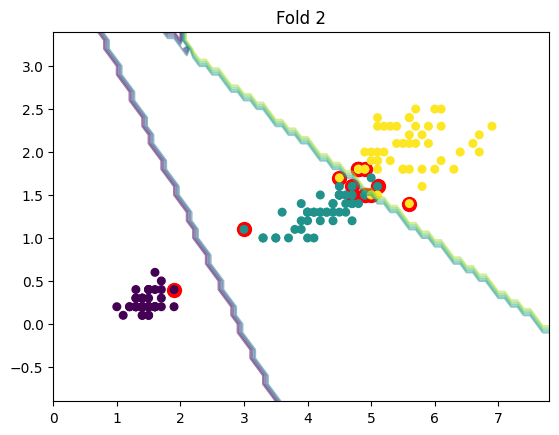

[0.9333333333333333, 0.9666666666666667]
Fold 3...
[LibSVM]Number of support vectors: [2 8 7]
*
optimization finished, #iter = 5
obj = -0.999616, rho = -3.392227
nSV = 3, nBSV = 0
*
optimization finished, #iter = 3
obj = -0.221976, rho = -2.163152
nSV = 2, nBSV = 0
*
optimization finished, #iter = 22
obj = -108.124343, rho = -20.254664
nSV = 14, nBSV = 11
Total nSV = 17


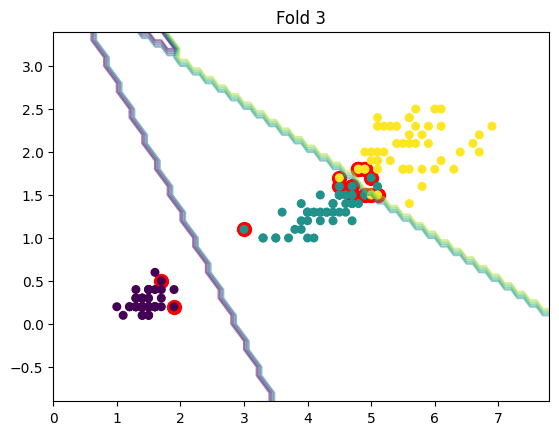

[0.9333333333333333, 0.9666666666666667, 0.9666666666666667]
Fold 4...
[LibSVM]Number of support vectors: [1 7 6]
*
optimization finished, #iter = 3
obj = -1.176470, rho = -3.788235
nSV = 2, nBSV = 0
*
optimization finished, #iter = 3
obj = -0.236686, rho = -2.292307
nSV = 2, nBSV = 0
*
optimization finished, #iter = 9
obj = -103.750072, rho = -16.250350
nSV = 12, nBSV = 10
Total nSV = 14


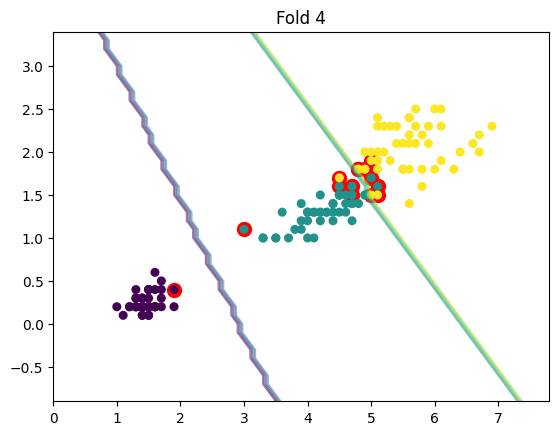

[0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 1.0]
Fold 5...
[LibSVM]*
optimization finished, #iter = 3
obj = -1.176470, rho = -3.788235
nSV = 2, nBSV = 0
*
optimization finished, #iter = 3
obj = -0.192864, rho = -2.170685
nSV = 2, nBSV = 0
*
optimization finished, #iter = 32
obj = -101.132406, rho = -17.375508
nSV = 13, nBSV = 10
Total nSV = 15
Number of support vectors: [1 7 7]


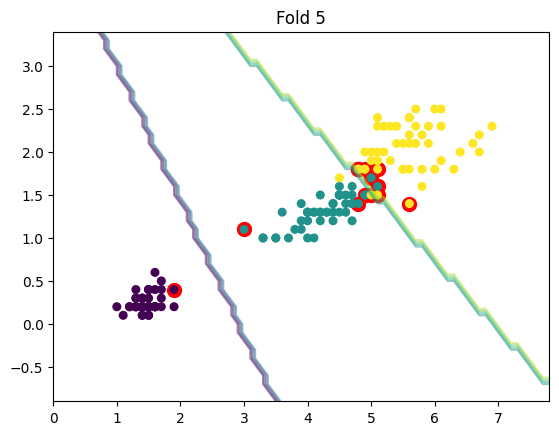

[0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9666666666666667]


In [53]:
for train_index, test_index in kf.split(X):
    print(f"Fold {fold_counter}...")
    x_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model on the current fold's training data
    svm = SVC(C=10, gamma=1, kernel='linear', verbose=True)
    svm.fit(x_train, y_train)

    # Print the number of support vectors
    print(f"Number of support vectors: {svm.n_support_}")

    # Plot the decision boundary and support vectors for this fold
    plt.figure()
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    y_pred = svm.predict(X_grid)
    Z = y_pred.reshape(xx.shape)
    plt.contour(xx, yy, Z, alpha=0.5, color='red')
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], c='red', s=100)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis')
    plt.title(f"Fold {fold_counter}")
    plt.show()

    # Calculate the accuracy for this fold
    fold_accuracy = svm.score(X_test, y_test)
    fold_accuracies.append(fold_accuracy)

    fold_counter += 1
    print(fold_accuracies)

Print the average accuracy across all folds

In [54]:
print(f"Average accuracy: {np.mean(fold_accuracies)}")

Average accuracy: 0.9666666666666666


**let's go over what happend in this code one more time**

- **Support Vector Machine (SVM):** SVM is a supervised machine learning algorithm used for classification or regression problems. It uses a technique called the kernel trick to transform your data and then, based on these transformations, finds an optimal boundary between the possible outputs.

- **Folds:** In cross-validation, the data is divided into ‘k’ subsets, or ‘folds’. Each fold is used once as a validation set, while the remaining folds form a training set. The image shows the results of the 4th and 5th folds.

- **Scatter Plots:** Each plot shows a scatter plot with data points colored differently according to their class. In “Fold 4”, there are three distinct clusters of data points, while in “Fold 5” there are only two visible clusters.

- **Decision Boundary:** The red line in each plot is the decision boundary created by the SVM. This line separates the classes. The goal of SVM is to find the optimal decision boundary that maximizes the margin between different classes.

- **Support Vectors:** Support vectors are the data points that lie closest to the decision boundary. The number of support vectors for each fold is displayed at the top left corner of each plot. For both folds, the number of support vectors is 17.
<span style="color:red;">
    Warnings: The warnings above each plot indicate that some keywords were not used by contour ‘color’. This could be due to a mismatch between the parameters provided and those expected by the contour function in the matplotlib library.</span>

In the end, we can see that our SVM performed quite well based on the decision boundary it selected, as shown in the plots related to the folds. As you can see, some data points are highlighted in red; these red data points are what our SVM used to find the boundary and predict each test data point to assign the correct class. In fact, our model performed so well that we achieved the same average accuracy with only **_two features_** as we did with four features and without **_KFold_**.

# Multi Layer Perceptron (MLP)

In [55]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def k_nearest_neighbors(x_train, y_train, x_test, k):
    y_pred = []
    for test_point in x_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in x_train]
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = y_train[nearest_indices]
        y_pred.append(np.bincount(nearest_labels).argmax())
    return np.array(y_pred)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_standardized, y_shuffled, test_size=0.3, random_state=42)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

An MLP (Multilayer Perceptron) is a type of artificial neural network (ANN) composed of multiple layers of nodes (neurons). Here’s an overview of its structure and function, particularly for iris classification:

- **<span style="color:brown;">Structure</span>:**
  - **<span style="color:brown;">Input Layer</span>:** Consists of three nodes, one for each feature in the iris dataset: sepal length, sepal width, and petal length.
  - **<span style="color:brown;">Hidden Layers</span>:** Vary in number and size depending on the problem's complexity and training data available.
  - **<span style="color:brown;">Output Layer</span>:** Consists of three nodes, one for each iris species: setosa, versicolor, and virginica.

- **<span style="color:brown;">Training Process</span>:**
  - **<span style="color:brown;">Backpropagation</span>:** Adjusts the weights of connections between nodes to minimize the error between the network’s predictions and actual values.
  - **<span style="color:brown;">Iteration</span>:** This error minimization process is repeated many times, with weights adjusted after each iteration.

- **<span style="color:brown;">Classification</span>:**
  - **<span style="color:brown;">Feature Input</span>:** The sample’s features are passed through the input layer.
  - **<span style="color:brown;">Propagation</span>:** Values are propagated through the network to the output layer.
  - **<span style="color:brown;">Prediction</span>:** The output layer provides a probability distribution over the three iris species. The species with the highest probability is selected as the predicted classification.

- **<span style="color:brown;">Summary</span>:**
  - An MLP is a powerful tool for classification tasks like iris classification.
  - It consists of multiple layers of nodes with adjustable weights.
  - Uses backpropagation during training to minimize prediction error.
  - Once trained, it classifies new samples based on their features.

**MLP structure:**

In [56]:
n0 = 4 # input layer
n1 = 8 # first hidden layer
n2 = 6 # second hidden layer
n3 = 1 # output layer

**Initial random weights**

In [57]:
w1 = np.random.uniform(low=-10,high= +10,size=(n1,n0))
w2 = np.random.uniform(low=-10,high= +10,size=(n2,n1))
w3 = np.random.uniform(low=-10,high= +10,size=(n3,n2))

**Activation function**

In [58]:
def activation(x):
    y = 1/(1 + np.exp(-1 * x))
    return y

**Feedforward algorithm**

In [59]:
def feedforward(input_net):
    # inputs * w1 --> x1 , y1= sigmoid(x1) , y1 * w2 --> x2
    # y2 = sigmoid(x2) , y2 * w3 --> x3 , y3 = sigmoid(x3) , y3 : output
    x1 = np.dot(input_net , w1.T)
    y1 = activation(x1)
    x2 = np.dot(y1 , w2.T)
    y2 = activation(x2)
    x3 = np.dot(y2 , w3.T)
    y3 = activation(x3)

    return y1 , y2 , y3

**Backpropagation**

In [60]:
def d_activation(out):
    # y = sigmoid(x) --> d_y = y * (1 - y)
    d_y = out * ( 1 - out)
    return d_y

In [61]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as acc

This part of the code implements a simple neural network with three layers (input, hidden, and output) and trains it using a backpropagation algorithm. Here’s a breakdown of what each section does:

### Initialization
- **Hyperparameters:**
  - **epochs:** Set to 500. Controls the number of training iterations.
  - **lr:** Set to 0.01. Determines the learning rate of the network.
- **Tracking Metrics:** Four empty lists are created to store the training and validation accuracy and mean squared error (MSE) at each epoch.

### Training Loop
1. **Outer Loop:** Iterates `epochs` times.
2. **Inner Loop:** Iterates over each sample in the training dataset `x_train`.
   - **Input Reshape:** The input is reshaped to (1, n0), where n0 is the number of input features.
   - **Target Output:** Retrieved from `y_train`.
   - **Feedforward:** The `feedforward` function computes the output of the network for the current input, returning outputs for each layer (y1, y2, y3).
   - **Error Calculation:** The error between the target output and the predicted output (y3) is computed.
   - **Backpropagation:** Updates the network weights:
     - **w1 Update:** Involves the error, the derivative of the activation function at the output layer, weights w3 and w2, and the input.
     - **w2 Update:** Involves the error, the derivative of the activation function at the output layer, weights w3, and the output of the first layer (y1).
     - **w3 Update:** Involves the error, the derivative of the activation function at the output layer, and the output of the second layer (y2).

### Validation
- **Evaluation:** After each epoch, the network is evaluated on the validation set `x_test`.
- **Feedforward:** Computes the output of the network for each sample in the validation set.
- **Metrics Calculation:** Computes MSE and accuracy between the predicted outputs and the true targets.
- **Tracking Metrics:** The MSE and accuracy are appended to the corresponding lists `List_MseValid` and `List_AccValid`.
- **Console Output:** The MSE and accuracy are printed to the console at each epoch.

### Summary
This code trains a simple neural network using a backpropagation algorithm by:
- Iterating through multiple epochs.
- Updating weights based on computed errors.
- Evaluating performance on a validation set after each epoch.
- Tracking and printing performance metrics (MSE and accuracy) to monitor training progress.

In [62]:
epochs = 500
lr = 0.01

List_AccTrain = []
List_MseTrain = []
List_AccValid = []
List_MseValid = []

for i in range(epochs):
    for j in range(len(x_train)):
        input = x_train[j] # shape input = (n0,)
        input = np.reshape(input , newshape=(1,n0)) # shape input = (1,n0)
        target = y_train[j]

        y1 , y2 , y3 = feedforward(input)
        error = target - y3

        # w1 = w1 - lr * (-2/N)*(error) * d_f3 * w3 * d_f2 * w2 * d_f1 * ...
        # ... * input
        # (-2/N) * error : N-->1
        # w1.shape = (n1 , n0)
        # d_f3.shape = (1,n3) = (1,1)
        # w3.shape = (n3 , n2) -- > d_f3 * w3 : shape= (1,n2)
        # d_f2.shape = (1, n2) --> diagonal(d_f2) : shape= (n2,n2)
        # d_f3 * w3 * diagonal(d_f2) --> shape = (1 , n2)
        # w2.shape = ( n2 , n1)
        # d_f3 * w3 * ( diagonal(d_f2) * w2 --> shape = (1,n1)
        # d_f1.shape = (1, n1) --> diagonal(d_f1) --> shape = (n1 , n1)
        # matrix1 * diagonal(d_f1) --> shape = (1, n1) --> matrix2.T --> shape=(n1,1)
        # input.shape = (1 , n0)
        # matrix2.T * input --> shape = (n1 , n0)

        d_f3 = d_activation(y3)

        d_f2 = d_activation(y2)
        diag_d_f2 = np.diagflat(d_f2)

        d_f1 = d_activation(y1)
        diag_d_f1 = np.diagflat(d_f1)

        temp1 = -2 * error * d_f3
        temp2 = np.dot(temp1 , w3)
        temp3 = np.dot(temp2 , diag_d_f2)
        temp4 = np.dot(temp3 , w2)
        temp5 = np.dot(temp4 , diag_d_f1)
        temp5 = temp5.T
        temp6 = np.dot(temp5 , input)

        w1 = w1 - lr * temp6

        # w2 = w2 - lr * ((-2/N)*error * d_f3 * w3 * diag_d_f2).T * y1
        w2 = w2 - lr * np.dot(temp3.T , y1)

        # w3 = w3 - lr * (-2/N)*error * d_f3 * y2
        w3 = w3 - lr * np.dot(temp1.T , y2)

#calculating MSE and accuracy for validation

    Netoutput_val = []
    target_val = []
    rnd_Netoutput_val = []
    for idx in range(len(x_test)):
      input = x_test[idx]
      target = y_test[idx]
      target_val.append(target)

      _ , _ , pred = feedforward(input)
      Netoutput_val.append(pred)
      rnd_Netoutput_val.append(np.round(pred))

    mse_val = mse(target_val , Netoutput_val)
    List_MseValid.append(mse_val)
    acc_val = acc(target_val , rnd_Netoutput_val)
    List_AccTrain.append(acc_val)
    print('epoch ' , i , ' : MSE_val = '  , mse_val, '\tAcc_val = ' , acc_val)
    print('---------------------------------------------------------------------')

epoch  0  : MSE_val =  1.5327538977451811 	Acc_val =  0.3333333333333333
---------------------------------------------------------------------
epoch  1  : MSE_val =  1.5327507522546133 	Acc_val =  0.3333333333333333
---------------------------------------------------------------------
epoch  2  : MSE_val =  1.5327475723210608 	Acc_val =  0.3333333333333333
---------------------------------------------------------------------
epoch  3  : MSE_val =  1.5327443573770654 	Acc_val =  0.3333333333333333
---------------------------------------------------------------------
epoch  4  : MSE_val =  1.5327411068426648 	Acc_val =  0.3333333333333333
---------------------------------------------------------------------
epoch  5  : MSE_val =  1.5327378201250537 	Acc_val =  0.3333333333333333
---------------------------------------------------------------------
epoch  6  : MSE_val =  1.5327344966182233 	Acc_val =  0.3333333333333333
---------------------------------------------------------------------

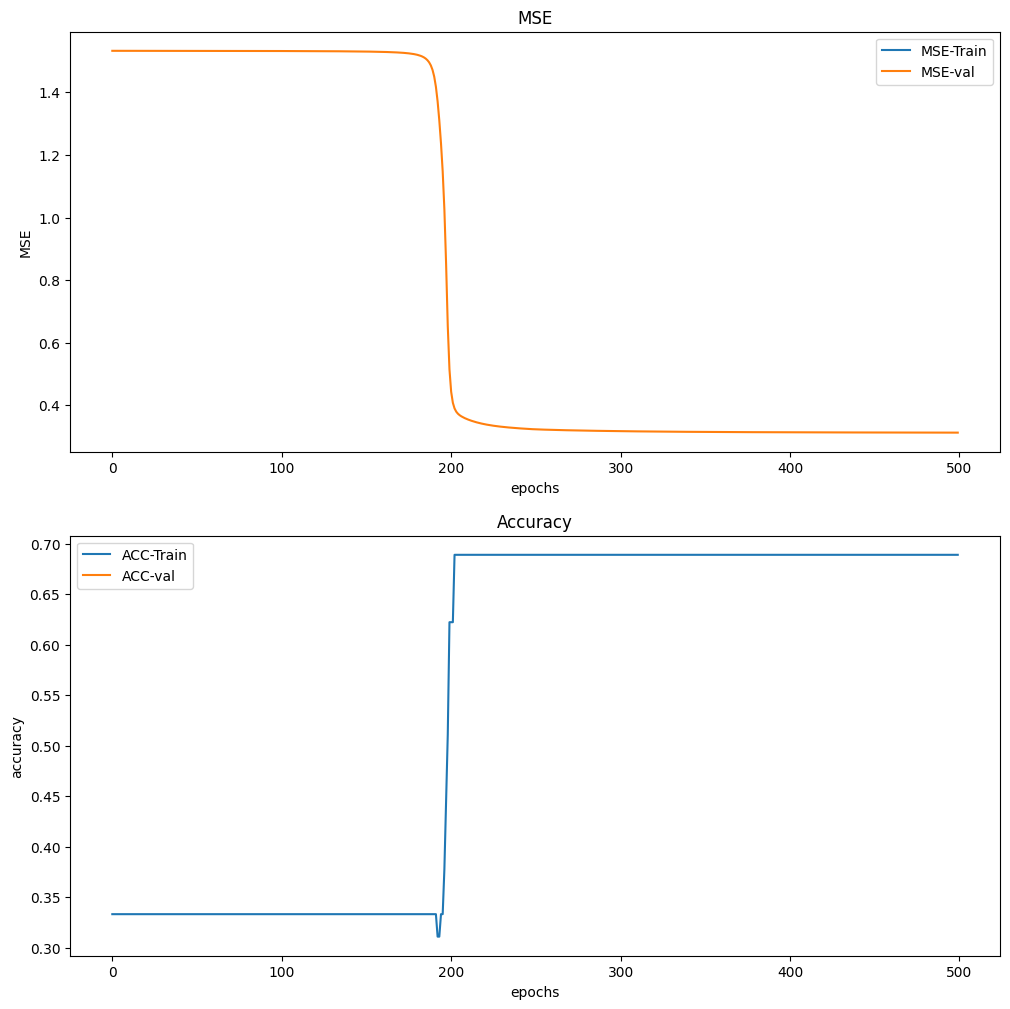

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize =(12 , 12))
plt.subplot(2,1, 1)
plt.title('MSE')
plt.plot(List_MseTrain, label ='MSE-Train') # Corrected here
plt.plot(List_MseValid , label = 'MSE-val') # Corrected here
plt.legend()
plt.xlabel('epochs') # Corrected here
plt.ylabel('MSE')

plt.subplot(2,1,2) # Corrected here
plt.title('Accuracy')
plt.plot(List_AccTrain , label = 'ACC-Train') # Corrected here
plt.plot(List_AccValid , label= 'ACC-val') # Corrected here
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

**let's test SKlearn MLP too**

In [64]:
mlp = MLPClassifier()

In [65]:
mlp.fit(x_train, y_train)

MLPClassifier()

In [66]:
y_pred_mlp = mlp.predict(x_test)

In [67]:
print("Classification report for sklearn MLP:\n" ,classification_report(y_test, y_pred_mlp))

Classification report for sklearn MLP:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        17
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



The Sklearn MLP classifier performed significantly better because it is highly optimized and has a better capability to find the global minimum, rather than getting stuck in local minima.

# CLUSTERING:


Clustering is a fundamental unsupervised machine learning technique used to identify patterns and relationships in data by grouping similar data points based on their features, without requiring labeled data. The goal is to partition the data into distinct clusters, where each cluster represents a group of similar data points. This technique has numerous applications in various fields, including image processing, text mining, and bioinformatics.

### Application to the Iris Dataset
In the context of the Iris dataset, clustering can identify distinct groups of iris flowers based on their sepal and petal measurements. The Iris dataset contains 150 samples, each with four features: sepal length, sepal width, petal length, and petal width. These features are used to cluster the data and distinguish between different groups of iris flowers.

In [68]:
import warnings
warnings.filterwarnings('ignore')

# Kmeans

First, we import the necessary libraries:

- **NumPy** and **Pandas** for array handling and data manipulation.
- **Matplotlib** and **Seaborn** for data visualization.
- **Scikit-learn** for importing the required dataset, the KMeans clustering method, and the scoring metric to evaluate clustering performance.



In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

At a high level, k-means is an unsupervised machine learning algorithm used for data clustering. The goal of k-means is to partition a dataset into k distinct, non-overlapping clusters, where each data point belongs to the cluster with the nearest mean. The algorithm iteratively assigns data points to clusters and updates the cluster means until convergence is achieved.

Here's a step-by-step breakdown of how the k-means algorithm works:

1. **<span style="color:brown;">Initialization</span>:** The algorithm begins by randomly initializing k cluster centroids, where k is a user-defined parameter. Each centroid is a vector in the same space as the input data.
2. **<span style="color:brown;">Assignment</span>:** In the first iteration, the algorithm assigns each data point to the nearest centroid based on Euclidean distance. This creates k clusters, where each cluster is defined by its set of member data points and its centroid.
3. **<span style="color:brown;">Update</span>:** After all data points have been assigned to clusters, the algorithm updates the centroids by computing the mean of all data points in each cluster. This creates new centroids that better represent the clusters.
4. **<span style="color:brown;">Iteration</span>:** The algorithm repeats steps 2 and 3, re-assigning data points to the nearest centroid and updating the centroids, until convergence is achieved. Convergence is typically defined as when the cluster assignments no longer change or when the change in centroid values falls below a pre-defined threshold.

### Improved Version:

At a high level, k-means is an unsupervised machine learning algorithm used for data clustering. Its goal is to partition a dataset into k distinct, non-overlapping clusters, with each data point belonging to the cluster with the nearest mean. The algorithm iteratively assigns data points to clusters and updates the cluster means until convergence.

Here's a step-by-step breakdown of how the k-means algorithm works:

1. **<span style="color:brown;">Initialization</span>:** 
   - Randomly initialize k cluster centroids (user-defined parameter).
   - Each centroid is a vector in the same space as the input data.

2. **<span style="color:brown;">Assignment</span>:** 
   - Assign each data point to the nearest centroid based on Euclidean distance.
   - Create k clusters, with each cluster defined by its member data points and its centroid.

3. **<span style="color:brown;">Update</span>:** 
   - Update centroids by computing the mean of all data points in each cluster.
   - Create new centroids that better represent the clusters.

4. **<span style="color:brown;">Iteration</span>:** 
   - Repeat steps 2 and 3, re-assigning data points to the nearest centroid and updating the centroids, until convergence.
   - Convergence is achieved when cluster assignments no longer change or when the change in centroid values falls below a predefined threshold.

We load our dataset into a variable and extract the features. Since we are using clustering, which is an unsupervised method, we don't need the labels. We then convert our data into a DataFrame for easier manipulation and visualization using pandas and other libraries.

By converting the input data to a DataFrame, we can:

- Use the `head()` method to view the first few rows of the DataFrame.
- Use the `describe()` method to view summary statistics for each feature.
- Use the `plot()` method to visualize the distribution of each feature or the relationships between features.

In [70]:
iris = load_iris()
x = iris.data
df = pd.DataFrame(x)
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Pairplot is a visualization tool in Seaborn library that creates a grid of scatter plots for each pair of features in a dataset. It is particularly useful for exploring the relationships between different variables in a dataset and identifying potential clusters or patterns.

In the context of the Iris dataset, a pairplot can help us visualize the relationships between the four features (sepal length, sepal width, petal length, and petal width) and identify any clusters or patterns that may exist. Here's an example code for creating a pairplot for the Iris dataset:

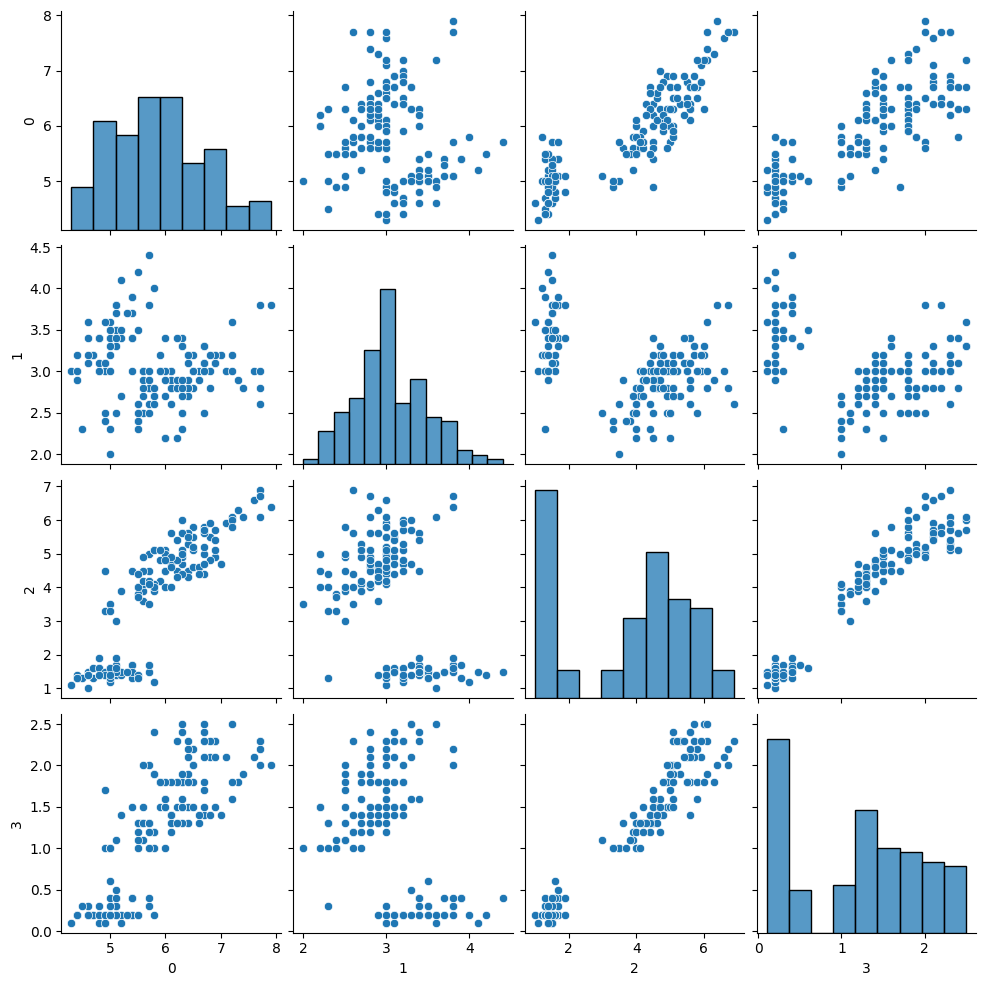

In [71]:
sns.pairplot(df)



---

**<span style="color:brown">Choosing the Optimal Number of Clusters in KMeans Clustering</span>**

**<span style="color:brown">Importance of Choosing the Right Value of \( k \)</span>**

Selecting the appropriate number of clusters, \( k \), is crucial in KMeans clustering:

- **Underfitting**: A small \( k \) may result in underfitting, where the clusters are too broad and fail to capture important patterns in the data.
- **Overfitting**: A large \( k \) may lead to overfitting, where the clusters are too narrow and fail to generalize to new data.

**<span style="color:brown">Methods to Choose the Right \( k \)</span>**

To determine an appropriate \( k \), it’s common to run the KMeans algorithm with different values of \( k \) and evaluate the results using various metrics:

- **Inertia**: Measures the compactness of the clusters, with lower values indicating tighter clusters.
- **Silhouette Score**: Assesses the separation between clusters, with higher values indicating well-separated clusters.
- **Elbow Method**: Involves plotting inertia as a function of \( k \) and looking for a "knee" or "elbow" in the plot. This indicates the point where adding more clusters no longer significantly reduces inertia.

**<span style="color:brown">Explanation of Inertia Calculation and Plotting</span>**

The process involves:

1. **Initialization**: Starting with an empty list to store inertia values.
2. **Iteration**: Running the KMeans algorithm for a range of cluster numbers (e.g., 1 to 10).
3. **Inertia Calculation**: For each number of clusters, calculating and storing the inertia value. Inertia is a measure of how well the KMeans algorithm has clustered the data, with lower values indicating better clustering.
4. **Plotting**: Creating a plot of inertia values against the number of clusters. The x-axis represents the number of clusters, while the y-axis represents the inertia values.

**<span style="color:brown">Purpose and Usage</span>**

This process helps determine the optimal number of clusters for a dataset using the elbow method. The elbow method involves looking for a "knee" in the plot of inertia values, where the rate of decrease starts to level off. The optimal number of clusters is often chosen to be the number that corresponds to this knee.

**<span style="color:brown">Conclusion</span>**

Using metrics such as inertia and methods like the elbow method, you can effectively choose the right number of clusters in KMeans clustering. This ensures that the clusters are meaningful and generalizable, avoiding underfitting and overfitting.

---



In [72]:
y=[]
for k in np.arange(1, 11):
    kmn = KMeans(n_clusters=k)
    kmn.fit(df)
    y.append(kmn.inertia_)

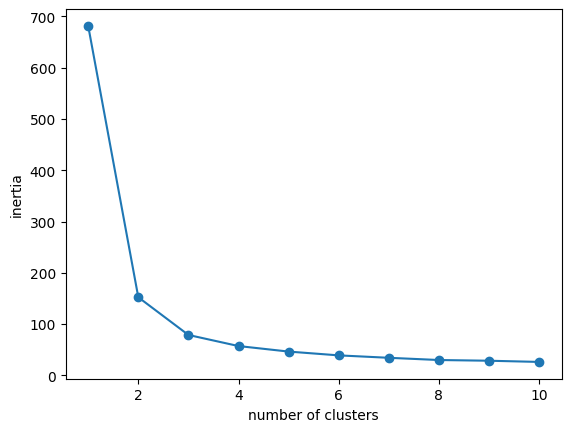

In [73]:
plt.plot(np.arange(1, 11), y, 'o-')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()



---
**<span style="color:brown">Performing KMeans Clustering and Visualizing Results on the Iris Dataset</span>**

This process performs KMeans clustering on the Iris dataset with 3 clusters (as determined by the elbow method) and visualizes the results using a pairplot. Here’s a breakdown:

#### KMeans Clustering

1. **Create and Fit KMeans Model**
   - A KMeans object with 3 clusters is created and fitted to the data.

2. **Predict Cluster Labels**
   - Cluster labels for each data point are predicted using the trained model.

3. **Get Cluster Centers**
   - The coordinates of the cluster centers are retrieved.

#### Preparing Data for Visualization

1. **Copy DataFrame and Add Labels**
   - A copy of the DataFrame is made, and a new column for cluster labels is added.

#### Visualizing the Results

1. **Create Pairplot**
   - A pairplot is created, coloring each point by its cluster label.

### Purpose and Benefits

This approach visualizes KMeans clustering results on the Iris dataset, showing data distribution across features and cluster groupings. The labeled DataFrame can be used for further analysis or visualization.

---



In [74]:
kmn = KMeans(n_clusters=3)
kmn.fit(df)
best_labels = kmn.predict(df)
center = kmn.cluster_centers_

In [75]:
df_kmeans = df.copy()
df_kmeans['label'] = best_labels

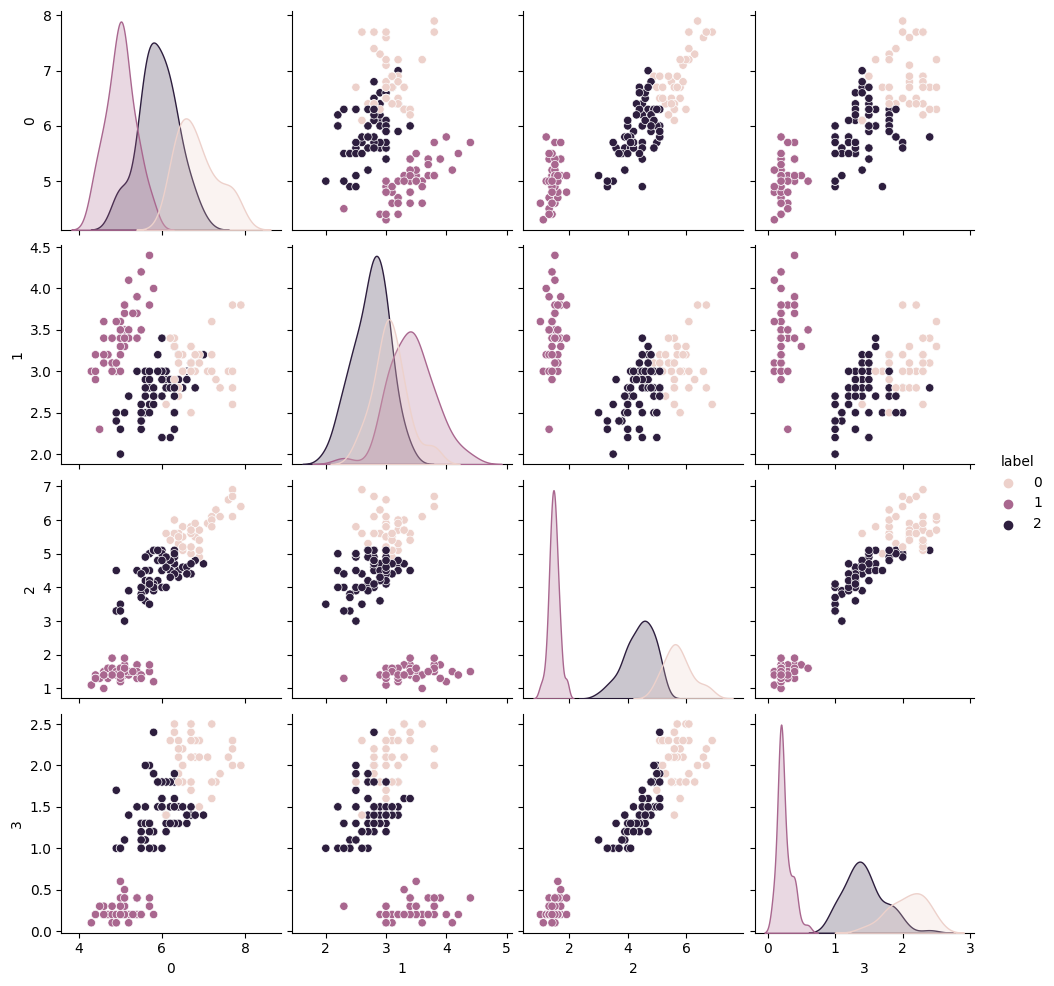

In [76]:
sns.pairplot(df_kmeans, hue='label')

### <span style="color:brown">Inertia and Silhouette Coefficient in Clustering</span>

**Inertia**:  
Inertia, or the within-cluster sum of squares, measures cluster compactness. It is the sum of squared distances between each data point and its cluster center. Lower inertia indicates closer data points to their cluster centers, signifying more compact clustering. In KMeans, inertia can be calculated using the `inertia_` attribute of the KMeans object (e.g., `kmn.inertia_`).

**Silhouette Coefficient**:  
The silhouette coefficient measures how well each data point fits into its cluster. It is the difference between the average distance to points in the same cluster (cohesion) and the average distance to points in the nearest neighboring cluster (separation), normalized by the maximum of these two values. A coefficient close to 1 indicates good clustering, close to -1 indicates poor clustering, and around 0 suggests data points are on the boundary between clusters. The silhouette coefficient can be calculated using the `silhouette_score` function from `sklearn.metrics` (e.g., `silhouette_score(X, labels)`).



In [77]:
print('Kmeans inertia:',kmn.inertia_)
silhouette_avg_kmeans = silhouette_score(df, best_labels)
print('silhouette_avg_kmeans',silhouette_avg_kmeans)

Kmeans inertia: 78.85144142614601
silhouette_avg_kmeans 0.5528190123564095


The inertia value of 78.85 suggests that the KMeans clustering has a moderate level of compactness, with lower values indicating more compact and potentially better clusters. Additionally, the silhouette coefficient of 0.55 indicates that, on average, the data points are moderately well-matched to their assigned clusters. A silhouette coefficient closer to 1 would mean that the data points are well-matched to their clusters, while a value close to -1 would suggest poor matching.

# Fuzzy CMeans

First of all, we need to install fuzzy part of scikit library which contain the fuzzy related methods, but it's not included in either conda nor colab

In [78]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | / - done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=6e573d3846e0c66365bf1fd0fc682fe36fb8f1f22290242c76119d9ed6112107
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [79]:
import skfuzzy as fuzz

Understood. Here's the revised text without the code:

---

Fuzzy C-Means (FCM) is a clustering algorithm that allows data points to belong to multiple clusters with varying degrees of membership. Unlike traditional algorithms like k-means or hierarchical clustering, which assign each data point to a single cluster, FCM assigns a membership degree between 0 and 1 for each data point across all clusters. This method extends k-means by using a fuzzy objective function.

The FCM algorithm begins by randomly initializing cluster centers. For each data point, it calculates the membership degree in each cluster based on the distance between the data point and the cluster center using the formula:

\[ \mu_{ij} = \left( \frac{d_{ij}^2}{\sum \limits_{k=1}^c d_{ik}^2} \right)^{\frac{1}{m-1}} \]

where \(\mu_{ij}\) is the membership degree of the \(i\)-th data point in the \(j\)-th cluster, \(d_{ij}\) is the Euclidean distance between the \(i\)-th data point and the \(j\)-th cluster center, and \(m\) controls the fuzziness of the clustering.

Cluster centers are then updated by taking a weighted average of the data points based on their membership degrees:

\[ v_{ij} = \frac{\sum \limits_{k=1}^n \mu_{ik}^m x_{kj}}{\sum \limits_{k=1}^n \mu_{ik}^m} \]

The algorithm iterates these steps until the cluster centers converge or a maximum number of iterations is reached.

In an application of FCM to a dataset, clustering is performed for a range of cluster values (e.g., 2 to 10). The silhouette score, which measures how well each data point fits into its cluster, is calculated for each result. This score ranges from -1 to 1, with higher values indicating better clustering. The resulting silhouette scores can help determine the optimal number of clusters for the dataset.

---

This version is more concise and focused on explaining the FCM algorithm and its application without including the code details.

Silhouette score for fuzzy CMeans with 2 clusters: 0.681
Silhouette score for fuzzy CMeans with 3 clusters: 0.550
Silhouette score for fuzzy CMeans with 4 clusters: 0.493
Silhouette score for fuzzy CMeans with 5 clusters: 0.364
Silhouette score for fuzzy CMeans with 6 clusters: 0.364
Silhouette score for fuzzy CMeans with 7 clusters: 0.351
Silhouette score for fuzzy CMeans with 8 clusters: 0.336
Silhouette score for fuzzy CMeans with 9 clusters: 0.307
Silhouette score for fuzzy CMeans with 10 clusters: 0.304


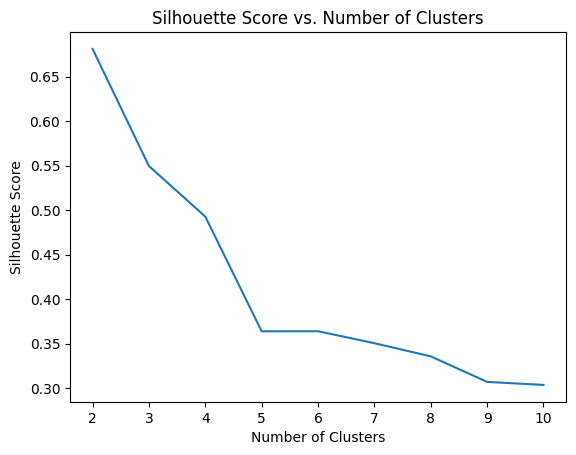

In [80]:
c_range = range(2, 11)

silhouette_scores = []

for c in c_range:
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(df.T, c=c, m=2, error=0.005, maxiter=1000)
    cluster_assignments = np.argmax(u, axis=0)
    fuzzy_centers = cntr.T


    silhouette_avg_fmeans = silhouette_score(df, cluster_assignments)
    print(f'Silhouette score for fuzzy CMeans with {c} clusters: {silhouette_avg_fmeans:.3f}')
    silhouette_scores.append(silhouette_avg_fmeans)

plt.plot(c_range, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

Now, we follow the same procedure as we did for KMeans. However, instead of exploring a range of cluster numbers, we use the optimal number of clusters (K) identified by the elbow method in KMeans. This ensures that we start with a well-estimated cluster count for the Fuzzy C-Means (FCM) algorithm, potentially improving the clustering results.

In [81]:
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(df.T, c=3, m=2, error=0.005, maxiter=1000)
cluster_assignments = np.argmax(u, axis=0)
fuzzy_centers = cntr.T

After running the clustering, we should get the clustering related scores, so we can easily see which one of them did better, although KMeans and FCM are based in the same principal, there are some differences that contribute to the metrics being different.

In [82]:
silhouette_avg_fmeans = silhouette_score(df, cluster_assignments)
print('silhouette for fuzzy CMeans:', silhouette_avg_fmeans)
inertia = np.sum(np.min(np.square(df), axis=1))
print('Inertia for fuzzy CMeans:', inertia)

silhouette for fuzzy CMeans: 0.549517512647162
Inertia for fuzzy CMeans: 302.33


After all that we draw a pairplot to see how does the data look after clustering with FCM

In [83]:
df_cmeans = df.copy()
df_cmeans['label'] = cluster_assignments

# Comparison



---

In this project, we aim to evaluate the performance of different machine learning classification methods on the Iris dataset, with a specific focus on analyzing how the choice of features affects the accuracy of each method. The Iris dataset consists of 150 samples from three species of iris flowers, each with four features: sepal length, sepal width, petal length, and petal width.

Our approach involves the following steps:

1. **Loading the Dataset**: We will load the Iris dataset from the sklearn library and split it into training and testing sets, allowing us to assess model generalizability.

2. **Implementing Classification Methods**: Starting with the Naive Bayes classifier, we will implement various classification algorithms. For each method, we will define functions to train (fit) the model and make predictions (predict).

3. **Evaluating Feature Combinations**: To understand the impact of different features on classification accuracy, we will evaluate our models using all possible combinations of the four features, including single features, pairs, triplets, and all four together. This involves training and testing our models on each subset of features.

4. **Calculating Accuracy**: For each feature combination, we will calculate the accuracy of the classifier on the test set, defined as the proportion of correctly classified samples.

5. **Storing Results**: We will store the accuracy results in a dictionary, with keys representing specific feature combinations and values representing the corresponding accuracies.

6. **Visualizing Results**: To provide a clear understanding of the results, we will create bar plots showing the accuracy for each feature combination. These plots will help identify which features and combinations contribute most significantly to classifier performance.

7. **Subsequent Steps**: After analyzing the Naive Bayes classifier, we will repeat the process for other methods such as Support Vector Machines (SVM) and k-Nearest Neighbors (k-NN). This comprehensive analysis will enable us to compare the performance of different classifiers and determine the most effective feature combinations for each.

By the end of this project, we aim to have a detailed understanding of how different feature subsets influence the performance of various classification algorithms on the Iris dataset. This analysis will highlight the strengths and weaknesses of each classifier and provide insights into the importance of feature selection in machine learning tasks.

---



**Naive Bayes**

In [84]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from itertools import combinations
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [85]:
def fit(x, y):
    n_samples, n_features = x.shape
    classes = np.unique(y)
    n_classes = len(classes)

    mean = np.zeros((n_classes, n_features), dtype=np.float64)
    var = np.zeros((n_classes, n_features), dtype=np.float64)
    prior = np.zeros(n_classes, dtype=np.float64)

    for i, c in enumerate(classes):
        x_c = x[y == c]
        mean[i, :] = np.mean(x_c, axis=0)
        var[i, :] = np.var(x_c, axis=0)
        prior[i] = x_c.shape[0] / float(n_samples)

    return mean, var, prior

In [86]:
def predict(x, mean, var, prior):
    n_samples, n_features = x.shape
    n_classes = len(prior)
    log_posterior = np.zeros((n_samples, n_classes))

    for i in range(n_classes):
        log_likelihood = -0.5 * np.sum(np.log(2 * np.pi * var[i]) + ((x - mean[i]) ** 2) / var[i], axis=1)
        log_posterior[:, i] = log_likelihood + np.log(prior[i])

    return np.argmax(log_posterior, axis=1)

In [87]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
accuracy_dict_NB = {}

In [90]:
for r in range(1, X_train.shape[1] + 1):

    for combo in combinations(range(X_train.shape[1]), r):
        combo = list(combo)

        X_train_combo = X_train[:, combo]
        X_test_combo = X_test[:, combo]

        mean, var, prior = fit(X_train_combo, y_train)

        y_pred = predict(X_test_combo, mean, var, prior)

        accuracy = accuracy_score(y_test, y_pred)

        combo_names = [feature_names[i] for i in combo]
        accuracy_dict_NB[tuple(combo_names)] = accuracy

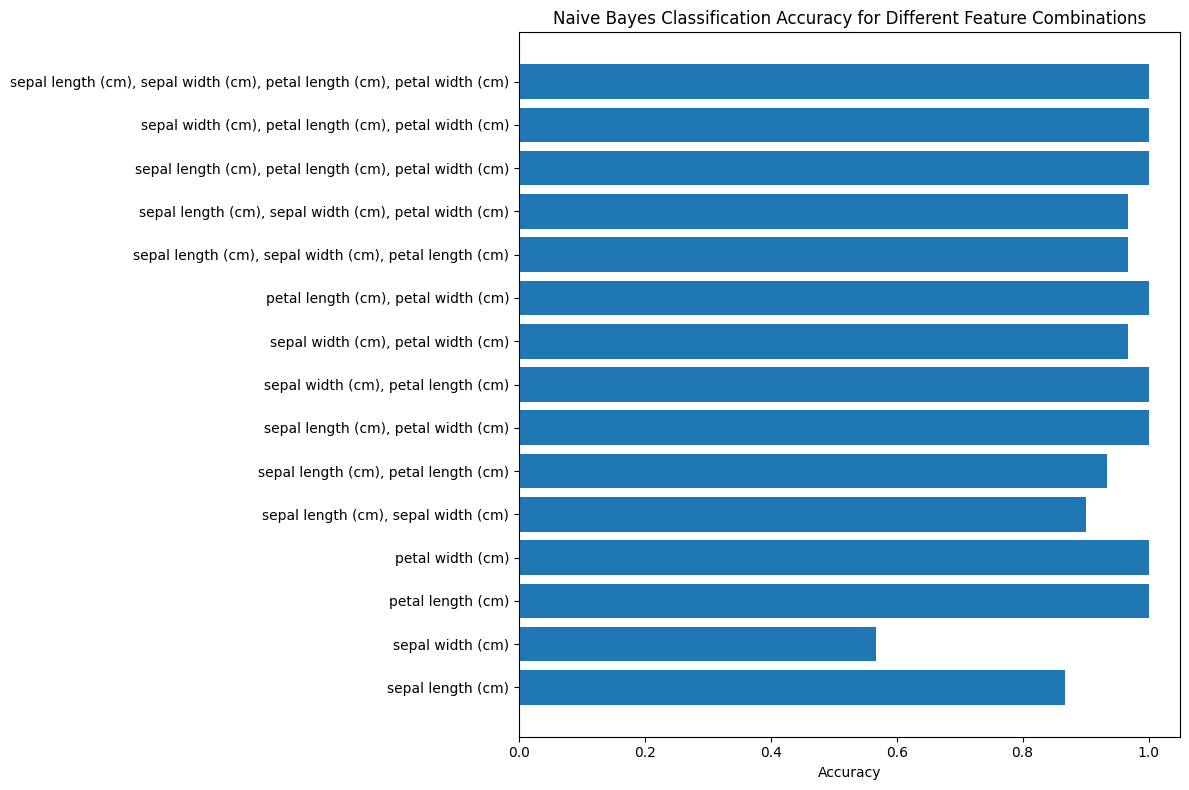

In [91]:
plt.figure(figsize=(12, 8))
plt.barh(range(len(accuracy_dict_NB)), list(accuracy_dict_NB.values()), align='center')
plt.yticks(range(len(accuracy_dict_NB)), [', '.join(key) for key in accuracy_dict_NB.keys()])
plt.xlabel('Accuracy')
plt.title('Naive Bayes Classification Accuracy for Different Feature Combinations')
plt.tight_layout()

In [92]:
naive_bayes_plot = plt
naive_bayes_plot.savefig('naive_bayes_accuracy_plot.png')
accuracy_df = pd.DataFrame.from_dict(accuracy_dict_NB, orient='index', columns=['Accuracy'])
print(accuracy_df)
plt.show()

                                                    Accuracy
(sepal length (cm),)                                0.866667
(sepal width (cm),)                                 0.566667
(petal length (cm),)                                1.000000
(petal width (cm),)                                 1.000000
(sepal length (cm), sepal width (cm))               0.900000
(sepal length (cm), petal length (cm))              0.933333
(sepal length (cm), petal width (cm))               1.000000
(sepal width (cm), petal length (cm))               1.000000
(sepal width (cm), petal width (cm))                0.966667
(petal length (cm), petal width (cm))               1.000000
(sepal length (cm), sepal width (cm), petal len...  0.966667
(sepal length (cm), sepal width (cm), petal wid...  0.966667
(sepal length (cm), petal length (cm), petal wi...  1.000000
(sepal width (cm), petal length (cm), petal wid...  1.000000
(sepal length (cm), sepal width (cm), petal len...  1.000000


<Figure size 640x480 with 0 Axes>

**<span style="font-size:20px; color:brown">K Nearest Neighbor (KNN)</span>**

In this part of the project, we evaluated the K Nearest Neighbor (KNN) classifier on the Iris dataset by analyzing the accuracy of different feature combinations. We trained the KNN model using every possible combination of the four features and calculated the accuracy for each. These results were stored in `accuracy_dict_KNN`. To visualize the performance across feature combinations, we created a bar plot and saved it for future reference. This analysis underscores the significant impact of feature selection on the performance of the KNN classifier.

In [93]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [94]:
def k_nearest_neighbors(x_train, y_train, x_test, k):
    y_pred = []
    for test_point in x_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in x_train]
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = y_train[nearest_indices]
        y_pred.append(np.bincount(nearest_labels).argmax())
    return np.array(y_pred)

In [95]:
accuracy_dict_KNN = {}

In [96]:
for r in range(1, X_train.shape[1] + 1):

    for combo in combinations(range(X_train.shape[1]), r):
        combo = list(combo)

        X_train_combo = X_train[:, combo]
        X_test_combo = X_test[:, combo]

        k_values = np.arange(3, 10)
        best_accuracy = 0

        for k in k_values:
            y_pred = k_nearest_neighbors(X_train_combo, y_train, X_test_combo, k)
            accuracy = np.mean(y_pred == y_test)
            if accuracy > best_accuracy:
                best_accuracy = accuracy

        combo_names = [feature_names[i] for i in combo]
        accuracy_dict_KNN[tuple(combo_names)] = best_accuracy

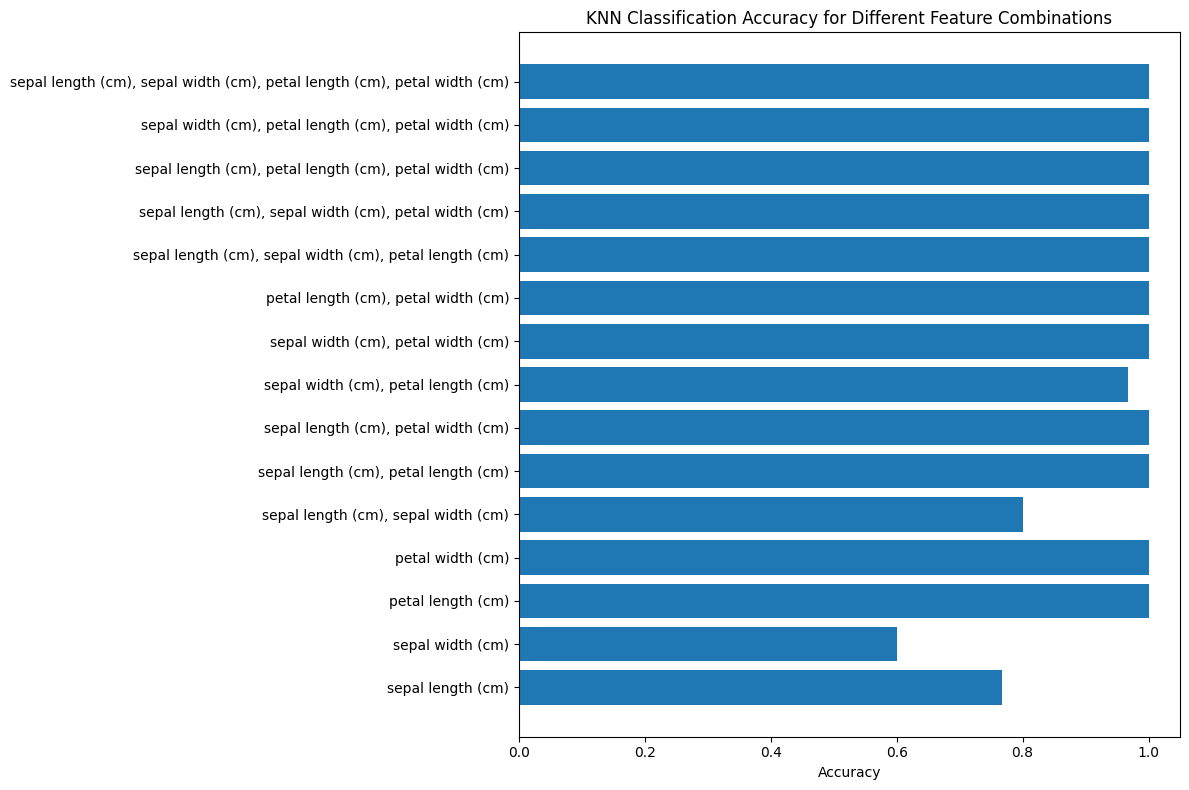

In [97]:
plt.figure(figsize=(12, 8))
plt.barh(range(len(accuracy_dict_KNN)), list(accuracy_dict_KNN.values()), align='center')
plt.yticks(range(len(accuracy_dict_KNN)), [', '.join(key) for key in accuracy_dict_KNN.keys()])
plt.xlabel('Accuracy')
plt.title('KNN Classification Accuracy for Different Feature Combinations')
plt.tight_layout()

In [98]:
knn_plot = plt

knn_plot.savefig('knn_accuracy_plot.png')

accuracy_df_knn = pd.DataFrame.from_dict(accuracy_dict_KNN, orient='index', columns=['Accuracy'])
print(accuracy_df_knn)
plt.show()

                                                    Accuracy
(sepal length (cm),)                                0.766667
(sepal width (cm),)                                 0.600000
(petal length (cm),)                                1.000000
(petal width (cm),)                                 1.000000
(sepal length (cm), sepal width (cm))               0.800000
(sepal length (cm), petal length (cm))              1.000000
(sepal length (cm), petal width (cm))               1.000000
(sepal width (cm), petal length (cm))               0.966667
(sepal width (cm), petal width (cm))                1.000000
(petal length (cm), petal width (cm))               1.000000
(sepal length (cm), sepal width (cm), petal len...  1.000000
(sepal length (cm), sepal width (cm), petal wid...  1.000000
(sepal length (cm), petal length (cm), petal wi...  1.000000
(sepal width (cm), petal length (cm), petal wid...  1.000000
(sepal length (cm), sepal width (cm), petal len...  1.000000


<Figure size 640x480 with 0 Axes>

**<span style="font-size:20px; color:brown">Support Vector Machine</span>**

In this part of the project, we evaluated the Support Vector Machine (SVM) classifier on the Iris dataset by analyzing the accuracy of different feature combinations. The dataset was split into training and testing sets, and we generated all possible combinations of the four features. For each combination, we trained the SVM model, made predictions on the test set, and calculated the accuracy. These accuracies were stored in a dictionary named `accuracy_dict_SVM`.

To visualize the results, we created a bar plot showing the accuracy for each feature combination, highlighting which features contribute most significantly to the model's performance. The plot was saved for future reference. Additionally, the accuracy results were displayed in a DataFrame, providing a clear overview of the classifier's performance across different feature subsets.

In [99]:
from sklearn.svm import SVC

In [100]:
C = 10
gamma = 1
kernel = 'linear'

In [101]:
accuracy_dict_SVM = {}

In [102]:
for r in range(1, X_train.shape[1] + 1):

    for combo in combinations(range(X_train.shape[1]), r):
        combo = list(combo)

        X_train_combo = X_train[:, combo]
        X_test_combo = X_test[:, combo]

        svm = SVC(C=C, gamma=gamma, kernel=kernel)
        svm.fit(X_train_combo, y_train)

        y_pred_svm = svm.predict(X_test_combo)

        accuracy = accuracy_score(y_test, y_pred_svm)

        combo_names = [feature_names[i] for i in combo]
        accuracy_dict_SVM[tuple(combo_names)] = accuracy

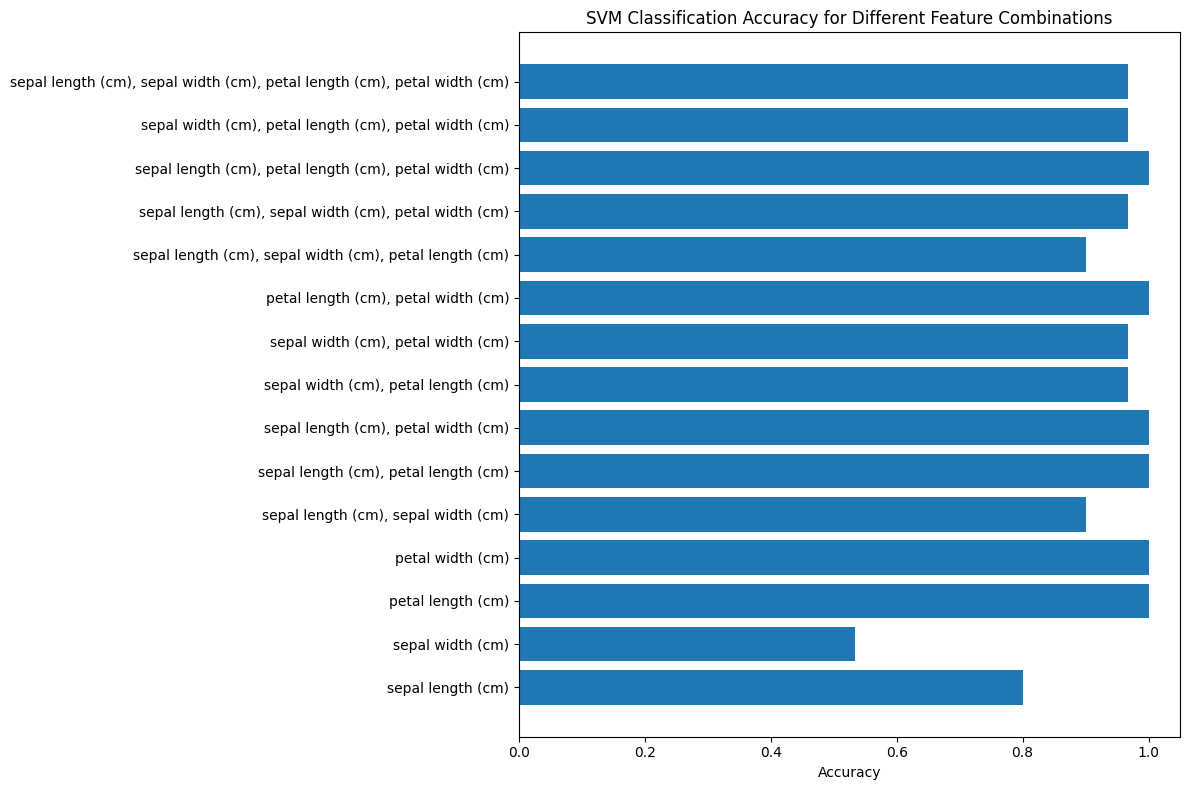

In [103]:
plt.figure(figsize=(12, 8))
plt.barh(range(len(accuracy_dict_SVM)), list(accuracy_dict_SVM.values()), align='center')
plt.yticks(range(len(accuracy_dict_SVM)), [', '.join(key) for key in accuracy_dict_SVM.keys()])
plt.xlabel('Accuracy')
plt.title('SVM Classification Accuracy for Different Feature Combinations')
plt.tight_layout()

In [104]:
svm_plot = plt

svm_plot.savefig('svm_accuracy_plot.png')

accuracy_df_svm = pd.DataFrame.from_dict(accuracy_dict_SVM, orient='index', columns=['Accuracy'])
print(accuracy_df_svm)
plt.show()

                                                    Accuracy
(sepal length (cm),)                                0.800000
(sepal width (cm),)                                 0.533333
(petal length (cm),)                                1.000000
(petal width (cm),)                                 1.000000
(sepal length (cm), sepal width (cm))               0.900000
(sepal length (cm), petal length (cm))              1.000000
(sepal length (cm), petal width (cm))               1.000000
(sepal width (cm), petal length (cm))               0.966667
(sepal width (cm), petal width (cm))                0.966667
(petal length (cm), petal width (cm))               1.000000
(sepal length (cm), sepal width (cm), petal len...  0.900000
(sepal length (cm), sepal width (cm), petal wid...  0.966667
(sepal length (cm), petal length (cm), petal wi...  1.000000
(sepal width (cm), petal length (cm), petal wid...  0.966667
(sepal length (cm), sepal width (cm), petal len...  0.966667


<Figure size 640x480 with 0 Axes>

**<span style="font-size:20px; color:brown">Multi Layer Perceptron (MLP)</span>**

In this part of the project, we evaluated the Multi-Layer Perceptron (MLP) classifier on the Iris dataset by analyzing the accuracy of different feature combinations. The dataset was split into training and testing sets, and we generated all possible combinations of the four features. For each combination, we trained the MLP model, made predictions on the test set, and calculated the accuracy. These accuracies were stored in a dictionary named `accuracy_dict_MLP`.

To visualize the results, we created a bar plot showing the accuracy for each feature combination, highlighting the impact of different features on the model's performance. The plot was saved for future reference. Additionally, the accuracy results were displayed in a DataFrame, providing a clear overview of the MLP classifier's effectiveness across various feature subsets.

In [105]:
from sklearn.neural_network import MLPClassifier

In [106]:
accuracy_dict_MLP = {}

In [107]:
for r in range(1, X_train.shape[1] + 1):

    for combo in combinations(range(X_train.shape[1]), r):
        combo = list(combo)

        X_train_combo = X_train[:, combo]
        X_test_combo = X_test[:, combo]

        mlp = MLPClassifier(random_state=42)
        mlp.fit(X_train_combo, y_train)

        y_pred_mlp = mlp.predict(X_test_combo)

        accuracy = accuracy_score(y_test, y_pred_mlp)

        combo_names = [feature_names[i] for i in combo]
        accuracy_dict_MLP[tuple(combo_names)] = accuracy

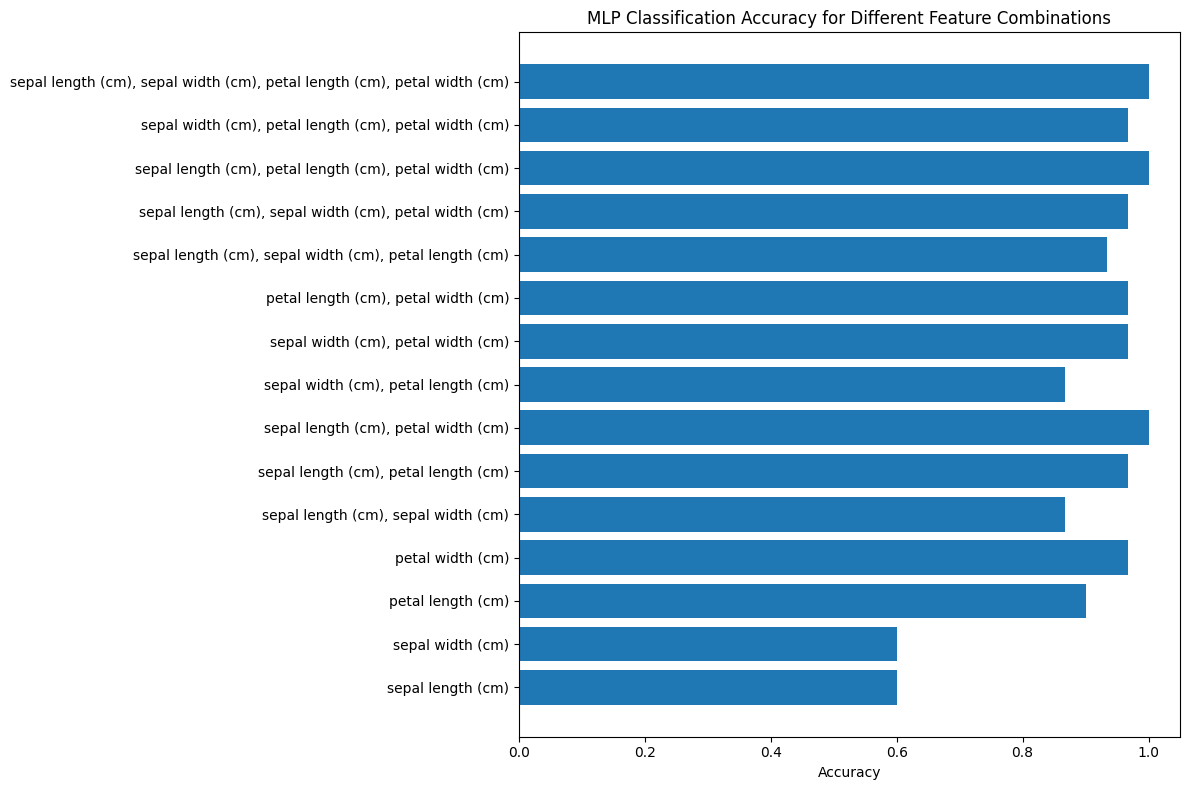

In [108]:
plt.figure(figsize=(12, 8))
plt.barh(range(len(accuracy_dict_MLP)), list(accuracy_dict_MLP.values()), align='center')
plt.yticks(range(len(accuracy_dict_MLP)), [', '.join(key) for key in accuracy_dict_MLP.keys()])
plt.xlabel('Accuracy')
plt.title('MLP Classification Accuracy for Different Feature Combinations')
plt.tight_layout()

In [109]:
mlp_plot = plt

mlp_plot.savefig('mlp_accuracy_plot.png')

accuracy_df_mlp = pd.DataFrame.from_dict(accuracy_dict_MLP, orient='index', columns=['Accuracy'])
print(accuracy_df_mlp)
plt.show()

                                                    Accuracy
(sepal length (cm),)                                0.600000
(sepal width (cm),)                                 0.600000
(petal length (cm),)                                0.900000
(petal width (cm),)                                 0.966667
(sepal length (cm), sepal width (cm))               0.866667
(sepal length (cm), petal length (cm))              0.966667
(sepal length (cm), petal width (cm))               1.000000
(sepal width (cm), petal length (cm))               0.866667
(sepal width (cm), petal width (cm))                0.966667
(petal length (cm), petal width (cm))               0.966667
(sepal length (cm), sepal width (cm), petal len...  0.933333
(sepal length (cm), sepal width (cm), petal wid...  0.966667
(sepal length (cm), petal length (cm), petal wi...  1.000000
(sepal width (cm), petal length (cm), petal wid...  0.966667
(sepal length (cm), sepal width (cm), petal len...  1.000000


<Figure size 640x480 with 0 Axes>

# CONCLUSION

In this final part of the project, we aggregate the accuracy results of different classifiers (Naive Bayes, KNN, SVM, and MLP) and create visual representations to facilitate comparison and analysis.

### Steps Involved:

**Data Preparation:**
- Load previously computed accuracy dictionaries for each classifier into pandas DataFrames, organizing the results for easy manipulation and visualization.

**Creating Subplots for Each Classifier:**
- Generate a composite plot with subplots for each classifier's accuracy, including horizontal bar charts for Naive Bayes, KNN, SVM, and MLP.
- Each subplot displays accuracies for all possible feature combinations, with feature names on the y-axis and accuracy values on the x-axis.

**Saving the Combined Plot:**
- Save the combined plot as `combined_accuracy_plot.png`, providing a clear comparison of each classifier's performance with different feature subsets.

**Plotting Accuracy Distribution:**
- Combine all accuracies from the different classifiers into a single list and create a histogram to show the distribution of accuracies across all classifiers.
- Save the distribution plot as `accuracy_distribution_plot.png`, highlighting overall performance trends.

**Displaying Results:**
- Display the accuracy DataFrames for each classifier, providing a detailed numerical overview of performance for each feature combination.

### Explanation of Results and Their Utility:

**Composite Plot:**
- **Visual Comparison:** Allows visual comparison of classifier performance on the same feature combinations, identifying consistently well-performing classifiers and crucial feature combinations.
- **Feature Importance:** Highlights important features or combinations, as high accuracy across classifiers suggests crucial features for classification tasks.

**Accuracy Distribution Plot:**
- **Overall Performance Insight:** Shows the frequency of different accuracy ranges, indicating overall classifier performance trends.
- **Performance Clustering:** Reveals common performance clusters, such as a peak in high accuracy values, indicating many high-performing feature combinations.

### Conclusion:
By analyzing these plots, we gain insights into the effectiveness of different classifiers and the significance of various feature combinations. This aids in:

- **Selecting the Best Classifier:** Identifying consistently high-performing classifiers.
- **Feature Selection:** Understanding which features or combinations are most important for high accuracy.
- **Improving Model Performance:** Informing decisions about feature engineering and model selection for future classification tasks.

Overall, this analysis enhances our understanding of the dataset and classifiers, enabling more effective and efficient model building for the Iris dataset or similar classification problems.

In [110]:
accuracy_df_nb = pd.DataFrame.from_dict(accuracy_dict_NB, orient='index', columns=['Accuracy'])
accuracy_df_knn = pd.DataFrame.from_dict(accuracy_dict_KNN, orient='index', columns=['Accuracy'])
accuracy_df_svm = pd.DataFrame.from_dict(accuracy_dict_SVM, orient='index', columns=['Accuracy'])
accuracy_df_mlp = pd.DataFrame.from_dict(accuracy_dict_MLP, orient='index', columns=['Accuracy'])

In [111]:
all_accuracies = list(accuracy_dict_NB.values()) + list(accuracy_dict_KNN.values()) + list(accuracy_dict_SVM.values()) + list(accuracy_dict_MLP.values())

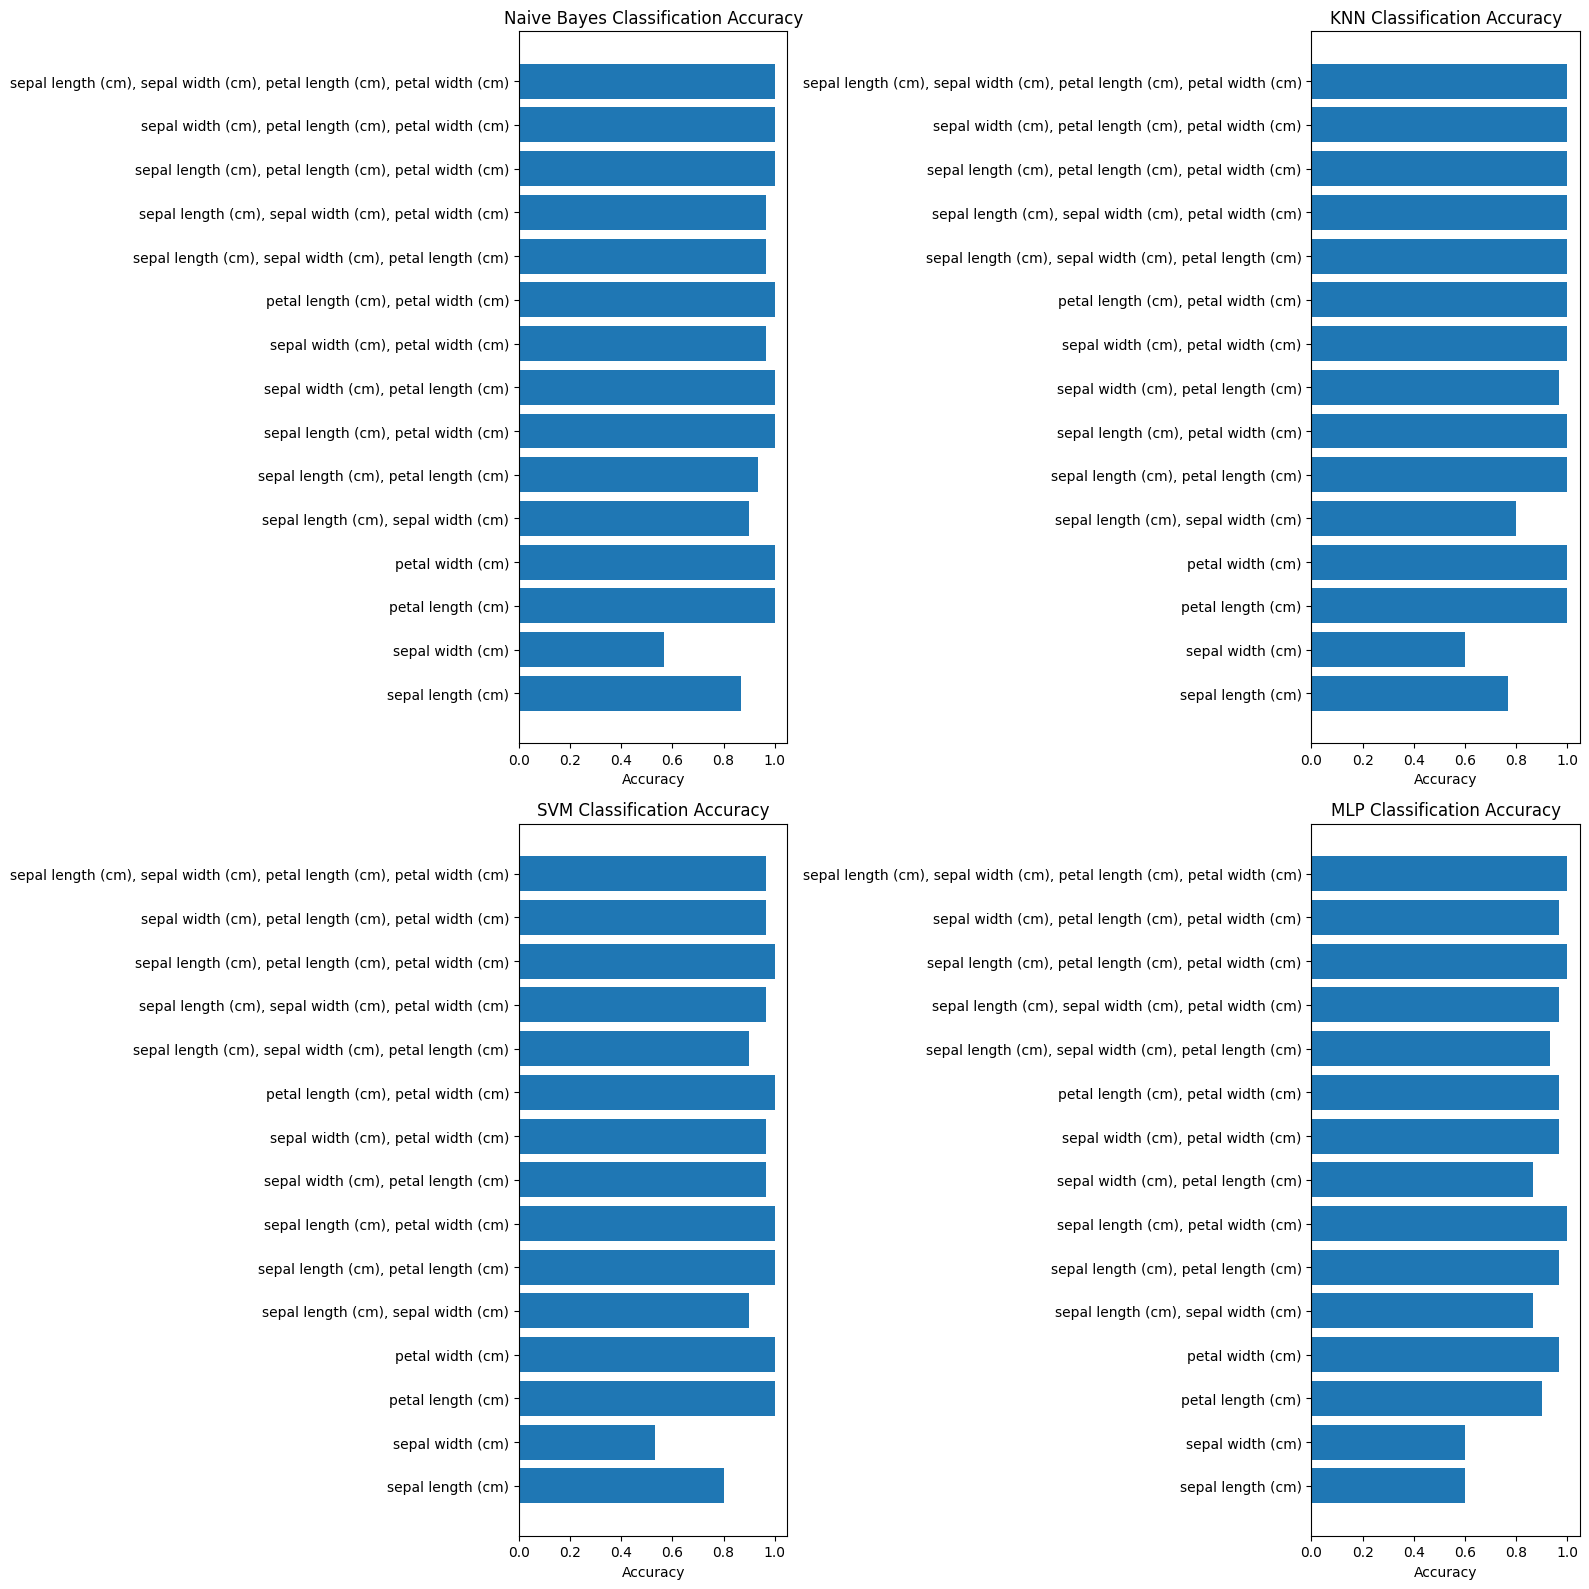

In [112]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

axes[0, 0].barh(range(len(accuracy_dict_NB)), list(accuracy_dict_NB.values()), align='center')
axes[0, 0].set_yticks(range(len(accuracy_dict_NB)))
axes[0, 0].set_yticklabels([', '.join(key) for key in accuracy_dict_NB.keys()])
axes[0, 0].set_xlabel('Accuracy')
axes[0, 0].set_title('Naive Bayes Classification Accuracy')

axes[0, 1].barh(range(len(accuracy_dict_KNN)), list(accuracy_dict_KNN.values()), align='center')
axes[0, 1].set_yticks(range(len(accuracy_dict_KNN)))
axes[0, 1].set_yticklabels([', '.join(key) for key in accuracy_dict_KNN.keys()])
axes[0, 1].set_xlabel('Accuracy')
axes[0, 1].set_title('KNN Classification Accuracy')

axes[1, 0].barh(range(len(accuracy_dict_SVM)), list(accuracy_dict_SVM.values()), align='center')
axes[1, 0].set_yticks(range(len(accuracy_dict_SVM)))
axes[1, 0].set_yticklabels([', '.join(key) for key in accuracy_dict_SVM.keys()])
axes[1, 0].set_xlabel('Accuracy')
axes[1, 0].set_title('SVM Classification Accuracy')

axes[1, 1].barh(range(len(accuracy_dict_MLP)), list(accuracy_dict_MLP.values()), align='center')
axes[1, 1].set_yticks(range(len(accuracy_dict_MLP)))
axes[1, 1].set_yticklabels([', '.join(key) for key in accuracy_dict_MLP.keys()])
axes[1, 1].set_xlabel('Accuracy')
axes[1, 1].set_title('MLP Classification Accuracy')

plt.tight_layout()
plt.savefig('combined_accuracy_plot.png')
plt.show()

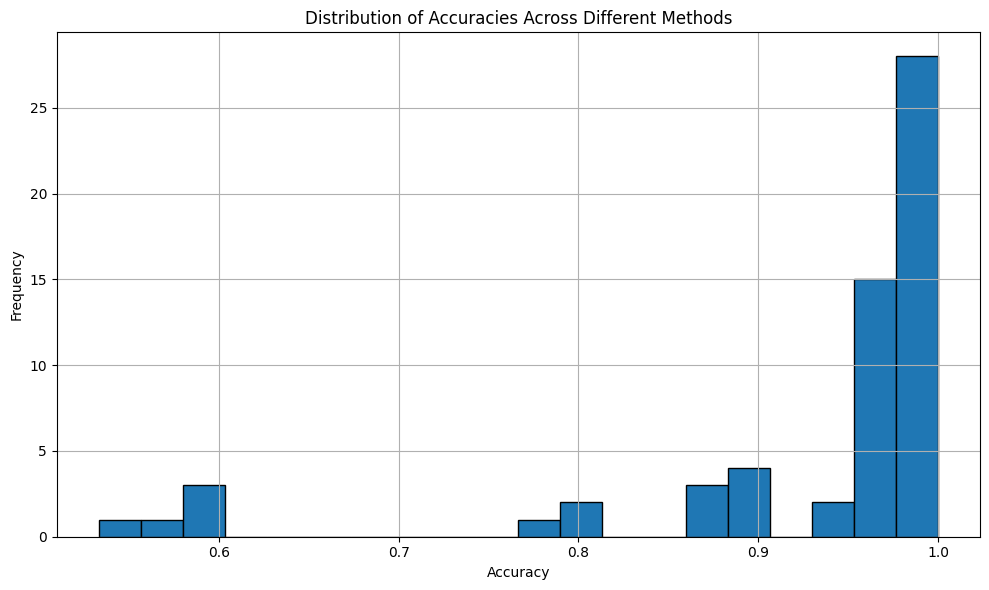

In [113]:
plt.figure(figsize=(10, 6))
plt.hist(all_accuracies, bins=20, edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracies Across Different Methods')
plt.grid(True)
plt.tight_layout()
plt.savefig('accuracy_distribution_plot.png')
plt.show()



---

**<span style="font-size:20px; color:red">Analysis of Combined Accuracy Plot and Accuracy Distribution Plot</span>**

**<span style="color:brown">Combined Accuracy Plot:</span>**

**Naive Bayes Classification Accuracy:**

- **Highest Accuracy:** Combinations that include petal length and petal width show the highest accuracy, reaching nearly 1.0. This suggests that these features are highly informative for classifying the iris species.
- **Lowest Accuracy:** Using sepal length or sepal width alone results in lower accuracy, indicating these features are less effective on their own for classification purposes.

**KNN Classification Accuracy:**

- **Highest Accuracy:** Similar to Naive Bayes, combinations involving petal length and petal width achieve the highest accuracy. This is likely because these features provide the most distinct separation between classes.
- **Variability:** The KNN classifier shows some variability with different combinations, but petal-related features consistently yield high accuracy.

**SVM Classification Accuracy:**

- **High Accuracy Across Combinations:** The SVM classifier performs well with many feature combinations, particularly those including petal length and width. This indicates the SVM’s robustness in handling varying feature sets.
- **Linear Separation:** The linear kernel in the SVM may effectively capture the separation between classes when petal measurements are included.

**MLP Classification Accuracy:**

- **Consistent High Accuracy:** The MLP classifier shows high accuracy for combinations involving petal length and width. The neural network likely captures the complex relationships between these features and the target classes.
- **Lower Accuracy for Sepal Features:** Combinations involving only sepal features generally result in lower accuracy, reflecting the importance of petal measurements in distinguishing between iris species.

**<span style="color:brown">Accuracy Distribution Plot:</span>**

- **Concentration Around 1.0:** The histogram shows a high concentration of accuracies near 1.0, indicating that many feature combinations yield near-perfect classification performance. This suggests that the classifiers, particularly when using petal-related features, are highly effective in distinguishing between the iris species.
- **Lower Accuracy Clusters:** There are also clusters of lower accuracies around 0.6 and 0.75. These likely correspond to feature combinations that include only sepal measurements or less informative features.

**<span style="color:brown">Why These Accuracies Are Like This:</span>**

**Feature Effectiveness:**

- **Petal Length and Width:** These features are particularly effective because they provide clear separations between the classes. In the Iris dataset, the differences in petal measurements are more pronounced across the species, making them highly discriminative.
- **Sepal Measurements:** Sepal length and width show less variability between the species, making them less effective for classification on their own.

**Classifier Characteristics:**

- **Naive Bayes:** Assumes feature independence and performs well when features are individually informative, which is the case with petal measurements.
- **KNN:** Relies on distance metrics; thus, it performs well when the data points are clearly separable in the feature space, which is true for petal measurements.
- **SVM:** Effective for high-dimensional spaces and works well with a clear margin of separation, making it robust for combinations involving petal features.
- **MLP:** Can capture complex patterns and interactions between features, excelling when informative features like petal length and width are included.

The high accuracies around 1.0 in the distribution plot and the performance patterns in the combined accuracy plot underscore the importance of feature selection. Petal measurements (length and width) are key to high classification accuracy across all classifiers, while sepal measurements are less informative on their own. The choice of classifier also impacts performance, with SVM and MLP showing robustness across different feature combinations. This analysis highlights the critical role of feature effectiveness and classifier characteristics in achieving high classification accuracy.

---



---

**<span style="font-size:20px; color:brown">Why Petal Features Dominate Performance</span>**

**Inherent Biological Differences:**

- **Distinct Separation:** Petal length and width exhibit more pronounced differences between the three iris species (Setosa, Versicolor, and Virginica) compared to sepal length and width. This inherent biological distinction makes petal features highly discriminative.
- **Range of Values:** The range of values for petal length and width is broader and more varied across the species, leading to clearer separation boundaries that classifiers can easily learn and exploit.

**Data Distribution:**

- **Cluster Formation:** In the feature space defined by petal length and width, data points form distinct clusters for each species. These clusters are well-separated, making it easier for classifiers to draw decision boundaries with high accuracy.
- **Less Overlap:** Minimal overlap between species in terms of petal measurements reduces the chances of misclassification.

**Informative Features:**

- **High Variance:** Petal features have higher variance between species compared to sepal features. Classifiers benefit from this variance as it provides more information to distinguish between classes.
- **Correlations:** Petal length and width are highly correlated with the species label, meaning changes in these features strongly predict species changes. This strong correlation enhances classifier performance.

**Visualization and Exploratory Data Analysis:**

- **Scatter Plots:** Visual analysis through scatter plots shows that petal measurements create clear and distinct clusters for each species, while sepal measurements do not provide the same level of clarity.
- **Principal Component Analysis (PCA):** PCA often shows that the first principal component heavily weights the petal features, indicating their importance.

**Classifier Mechanisms:**

- **Distance-Based Methods:** Classifiers like KNN, which rely on distance metrics, perform better with features that create distinct spatial separations. Petal features provide such separations, making distance calculations more effective.
- **Margin-Based Methods:** SVM benefits from features that create wide margins between classes. Petal features enable SVM to find these margins effectively.
- **Non-Linear Models:** MLP, which captures non-linear relationships, leverages the strong patterns present in petal features to achieve high accuracy.

The dominance of petal features in classifier performance for the Iris dataset is due to the distinct and pronounced differences in petal measurements between species. These features provide clear, non-overlapping clusters in the feature space, high variance, and strong correlations with the target labels, all of which enhance the ability of classifiers to learn and accurately predict the species. Sepal features do not offer the same level of discrimination, leading to lower accuracy when used in isolation. This underscores the importance of selecting features that capture the most significant variations related to the target variable in classification tasks.

---